# AIML Capstone Project - Industrial Safety and Health Analytics Database

<a id="table-of-contents"></a>
## Table of Contents

1. [Problem Statement](#overview)
2. [Library Import](#import-libraries)
3. [Data Collection](#data-collection)
    - [Data Collection Summary](#data-summary)
4. [Data Cleansing](#data-cleansing)
    - [Data Cleansing Summary](#cleansing-summary)
5. [Data Preprocessing](#data-preprocessing)
6. [EDA (Data Analysis and Preparation)](#eda)
    - [Univariate Analysis](#univariate-analysis)
    - [Bivariate Analysis](#bivariate-analysis)
    - [Correlation Plot](#data-correlation)
    - [Multivariate Analysis](#multivariate-analysis)
    - [Timeseries Analysis](#timeseries-analysis)
    - [EDA Summary](#eda-summary)
7. [NLP Pre-processing](#nlp-preprocessing)
    - [N-Grams](#ngram)
    - [Word Cloud](#word-cloud)
8. [Feature Engineering](#feature-engineering)
    - [Label Encoding](#label-encoding)
    - [Feature Extraction](#feature-extraction)
    - [Resampling Techniques](#resampling)
9. [Design, train and test machine learning classifiers](#ml-models)
    - [Unsampled vs Sampled and Comparisons of Vectorization techniques](#lr-comparison)
    - [Compare ML Models](#allML-comparison)
    - [Ensemble Techniques : Stacking](#ml-stacking)
    - [Summary](#ml-summary)
10. [Design, train and test Neural networks classifiers](#ann-models)
    - [Convert Classification to Numeric problem](#ann-models-clas-to-num-problem)
    - [Multiclass classification - Target variable - One hot encoded](#ann-models-multi-class)
11. [Design, train and test RNN or LSTM classifiers](#nlp-models)
    - [Creating a Model with Text Inputs Only](#nlp-models-text-input)
    - [Creating a Model with Categorical features Only](#nlp-models-cat-features)
    - [Creating a Model with Multiple Inputs](#nlp-models-multiple-input)
12. [Conclusion](#conclusion)
13. [Chat Interface using tkinter](#tkinter)
14. [Inferences](#inferences)

<a id="overview"></a>
## 1. Problem Statement

### Domain - Industrial safety. NLP based Chatbot.

### Context:

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### Data Description:

The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

**Columns description:**

- **Data**: timestamp or time/date information
- **Countries**: which country the accident occurred (anonymised)
- **Local**: the city where the manufacturing plant is located (anonymised)
- **Industry sector**: which sector the plant belongs to
- **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
- **Gender**: if the person is male or female
- **Employee or Third Party**: if the injured person is an employee or a third party
- **Critical Risk**: some description of the risk involved in the accident
- **Description**: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database 

Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

<a id="import-libraries"></a>
## 2. Library Import

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import random
import time
from matplotlib import pyplot as plt
%matplotlib inline
import statistics

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None
from scipy.stats import randint as sp_randint

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,BaggingClassifier, StackingClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.utils import resample

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
import tensorflow as tF
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import unicodedata
import unidecode
from autocorrect import Speller
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

from keras.callbacks import EarlyStopping, ModelCheckpoint

from google_trans_new import google_translator  

from ann_visualizer.visualize import ann_viz;
from keras.utils.vis_utils import plot_model

# Deep learning libraries
from keras.utils import np_utils
from keras.layers import Input
from keras.layers.merge import Concatenate
from tensorflow. keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
#nltk.download()

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="data-collection"></a>
## 3. Data Collection

In [4]:
#when the dataset is on github
#path = '../input/Data Set - industrial_safety_and_health_database_with_accidents_description.csv'
path = 'Data Set - industrial_safety_and_health_database_with_accidents_description.csv'
idf = pd.read_csv(path)

display(idf.head())

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### Shape of the data

In [5]:
print("Number of rows = {0} and Number of Columns = {1}".format(idf.shape[0], idf.shape[1]))

Number of rows = 425 and Number of Columns = 11


#### Dataframe Info

In [6]:
print(idf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB
None


<a id="data-summary"></a>
### Data Collection Summary:

1. There are about 425 rows and 11 columns in the dataset.
2. We noticed that that the first column is potentially named incorrectly. It is the 'date' column.
3. The name of the first column is missing. This is potentially the Serial Number column.
4. Other than the above two, the all other columns are categorical columns.

<a id="data-cleansing"></a>
## 4. Data Cleansing

##### Drop irrelevant column Unnamed:0

In [7]:
idf.drop('Unnamed: 0', axis=1, inplace=True)

##### Rename the columns with proper naming convention

In [8]:
idf.rename(columns = { 'Data' : 'Date',
                      'Industry Sector' : 'Industry_Sector', 
                      'Accident Level': 'Accident_Level',
                      'Countries' : 'Country',
                      'Genre' : 'Gender',
                      'Potential Accident Level' : 'Potential_Accident_Level',
                      'Employee or Third Party' : 'Employee_Type', 
                      'Critical Risk' : 'Critical_Risk'}, inplace = True)

##### Defining a function which gives the dataframe with all the analysis.

In [9]:
def getsummary(idf):
    print('Dataset Shape: {}'.format(idf.shape))
    print('Total Number of rows in dataset: {}'.format(idf.shape[0]))
    print('Total Number of columns in dataset: {}'.format(idf.shape[1]))
    print('Various datatypes present in the dataset are: {}'.format(idf.dtypes.value_counts()))
    
    summary = pd.DataFrame(idf.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    #summary['Name'] = summary[['Name', 'dtypes']]
    summary['Misssing_values'] = idf.isnull().sum().values
    summary['Unique_values'] = idf.nunique().values
    summary['Duplicate_values'] = idf.duplicated().sum()
    
    return summary

In [10]:
# Calling the above defined function by giving the input as a dataframe
getsummary(idf)

Dataset Shape: (425, 10)
Total Number of rows in dataset: 425
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object    10
dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values
0,Date,object,Date,0,287,7
1,Country,object,Country,0,3,7
2,Local,object,Local,0,12,7
3,Industry_Sector,object,Industry_Sector,0,3,7
4,Accident_Level,object,Accident_Level,0,5,7
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,7
6,Gender,object,Gender,0,2,7
7,Employee_Type,object,Employee_Type,0,3,7
8,Critical_Risk,object,Critical_Risk,0,33,7
9,Description,object,Description,0,411,7


#### Drop Duplicates

##### Checking those the duplicates we found in above dataframe

In [11]:
print('There are {} duplicates in the dataset as below'.format(idf.duplicated().sum()))
idf[idf.duplicated()]

There are 7 duplicates in the dataset as below


,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [12]:
getsummary(idf)

Dataset Shape: (425, 10)
Total Number of rows in dataset: 425
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object    10
dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values
0,Date,object,Date,0,287,7
1,Country,object,Country,0,3,7
2,Local,object,Local,0,12,7
3,Industry_Sector,object,Industry_Sector,0,3,7
4,Accident_Level,object,Accident_Level,0,5,7
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,7
6,Gender,object,Gender,0,2,7
7,Employee_Type,object,Employee_Type,0,3,7
8,Critical_Risk,object,Critical_Risk,0,33,7
9,Description,object,Description,0,411,7


##### Drop the duplicate values from the dataframe.

In [13]:
idf.drop_duplicates(inplace=True)
print('After removing duplicates the shape of the dataset is:',idf.shape)

After removing duplicates the shape of the dataset is: (418, 10)


##### Calling the function again to get some more insights

In [14]:
getsummary(idf)

Dataset Shape: (418, 10)
Total Number of rows in dataset: 418
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object    10
dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values
0,Date,object,Date,0,287,0
1,Country,object,Country,0,3,0
2,Local,object,Local,0,12,0
3,Industry_Sector,object,Industry_Sector,0,3,0
4,Accident_Level,object,Accident_Level,0,5,0
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,0
6,Gender,object,Gender,0,2,0
7,Employee_Type,object,Employee_Type,0,3,0
8,Critical_Risk,object,Critical_Risk,0,33,0
9,Description,object,Description,0,411,0


* We can observe in the above dataframe that there are only 411 unique values in the Description column but we have 418 number of records in total. 
* We can assume that there are still 7 duplicate values in the description column.
* We will check these duplicates and drop them if required.

##### Printing all the duplicate values

In [15]:

print('Printing the {} duplicates'.format(idf.duplicated(subset=['Description'],keep=False).sum()))
idf[idf.duplicated(subset=['Description'],keep=False)].sort_values(by='Description')

Printing the 14 duplicates


,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
166,2016-07-07 00:00:00,Country_01,Local_03,Mining,IV,V,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
167,2016-07-07 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
261,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
263,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
412,2017-06-20 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Employee,Others,"In circumstance, the AHK-903 license plate (Em..."
413,2017-06-20 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Others,"In circumstance, the AHK-903 license plate (Em..."
130,2016-05-26 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"In the geological reconnaissance activity, in ..."
131,2016-05-26 00:00:00,Country_03,Local_10,Others,I,I,Male,Employee,Others,"In the geological reconnaissance activity, in ..."
143,2016-06-08 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Project of Vazante that carried out sediment c...
144,2016-06-08 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Others,Project of Vazante that carried out sediment c...


* We can observe that for each pair of the 7 duplicate descriptions, only one or two column values are different.
* Each of the duplicate incidents happended on the same timestamp as the other. Thus these are different reportings of the same incident.
* We will retain them as some of these incidents have been reported under different Accident Levels and Potentials Accident Levels.

#### Check Unique Values

Let's check the unique and frequency(mode) of each variable. We will skip the Date and Description Columns.

In [16]:
# Check unique values of all columns except 'Description' column
for col in idf.columns:
    if (col!='Description') and (col!='Date'):
        print(idf[col].value_counts())
        print('*'*50)

Country_01    248
Country_02    129
Country_03     41
Name: Country, dtype: int64
**************************************************
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64
**************************************************
Mining    237
Metals    134
Others     47
Name: Industry_Sector, dtype: int64
**************************************************
I      309
II      40
III     31
IV      30
V        8
Name: Accident_Level, dtype: int64
**************************************************
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential_Accident_Level, dtype: int64
**************************************************
Male      396
Female     22
Name: Gender, dtype: int64
**************************************************
Third Party             185
Employee                178
Third Party (Rem

* We observed that there are records of accidents from 1st Jan 2016 to 9th July 2017 in every month. So there are no outliers in the 'Date' column.

* There are only three country types so there are no outliers in 'Country' column.

* There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

* There are only three Industry Sector types which are in sequence so there are no outliers in 'Industry Sector' column.

* There are only five Accident Level types which are in sequence so there are no outliers in 'Accident Level' column.

* There are only six Potential Accident Level types which are in sequence so there are no outliers in 'Potential Accident Level' column.

* There are only two Gender types in the provided data so there are no outliers in 'Gender' column.

* There are only three Employee types in the provided data so there are no outliers in 'Gender' column.

* There are quite a lot of Critical risk descriptions and we don't see any outliers but with the help of SME we can decide whether this column has outliers or not.

<a id="cleansing-summary"></a>
### Data Cleansing Summary:

1. Removed 'Unnamed: 0' column and renamed rest of the columns as per proper naming convention.
2. Dataset contains total of 10 columns in which all are object data type.
3. There are no null / missing values present in the dataset.
4. There are no outliers in the dataset.
5. We had 7 duplicate instances in the dataset and dropped those duplicates.
6. There were 7 more instances of the same incident reported twice (same description). These records have been retained, because these may reflect the reporting of same incident but affecting different individuals. Until further clarity is provided, we chose not to delete these.
7. We are left with 418 rows and 10 columns after data cleansing.

<a id="data-preprocessing"></a>
## 5. Data Pre-processing

##### Checking shape of the dataframe

In [17]:
data_shape = idf.shape
print('Data set contains {} number of rows and {} number of columns' .format(data_shape[0], data_shape[1]))

Data set contains 418 number of rows and 10 number of columns


##### Check Summary of the dataFrame

In [18]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Country                   418 non-null    object
 2   Local                     418 non-null    object
 3   Industry_Sector           418 non-null    object
 4   Accident_Level            418 non-null    object
 5   Potential_Accident_Level  418 non-null    object
 6   Gender                    418 non-null    object
 7   Employee_Type             418 non-null    object
 8   Critical_Risk             418 non-null    object
 9   Description               418 non-null    object
dtypes: object(10)
memory usage: 35.9+ KB


##### Looping through all the columns in the dataframe and checking counts of unique values.

In [19]:
for col in idf.columns:
    if (col!='Description') and (col!='Date'):
        print(idf[col].value_counts())
        print('*'*50)

Country_01    248
Country_02    129
Country_03     41
Name: Country, dtype: int64
**************************************************
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64
**************************************************
Mining    237
Metals    134
Others     47
Name: Industry_Sector, dtype: int64
**************************************************
I      309
II      40
III     31
IV      30
V        8
Name: Accident_Level, dtype: int64
**************************************************
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential_Accident_Level, dtype: int64
**************************************************
Male      396
Female     22
Name: Gender, dtype: int64
**************************************************
Third Party             185
Employee                178
Third Party (Rem

* Six type of Potential Accident Levels (1 to 6) and we see that there is only one value registered under 'Accident level 6' and   it can be replaced to level 5 to reduce the complexity

In [20]:
# Replace Level 6 value to Level 5
idf['Potential_Accident_Level'] = idf['Potential_Accident_Level'].replace('VI', 'V')
idf.head(2)

,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


##### Accidents may increase or decrease throughout the year or month, so we are adding datetime features such as year and month

In [21]:
# Convert string Date time into Python Date time object. 
idf['Date'] = pd.to_datetime(idf['Date'])

In [22]:
idf['Month'] = idf.Date.dt.month
idf['Year'] = idf.Date.dt.year
idf['Day'] = idf.Date.dt.day
idf['Weekday'] = idf.Date.dt.weekday

<a id="eda"></a>
## 6. EDA (Data Analysis and Preparation)

#### Taget Variable Identification

* **Target variable(s):** 'Accident_Level', 'Potential_Accident_Level'
* **Predictors:** 'Date', 'Country', 'Local', 'Industry_Sector', 'Gender', 'Employee_Type', 'Critical_Risk', 'Description'

<a id="univariate-analysis"></a>
### Univariate Analysis

In [23]:
# Creating a function to make univariate plots for analysis
def plot(col, title, palette, edgecolor):

    value = idf[col].value_counts()[1]
    plt.figure(figsize = (20,10))
    plt.subplot(2,2,1)
    sns.countplot(idf[col], palette = palette, edgecolor = edgecolor, order=idf[col].value_counts().index, alpha = 1.0, saturation=1);
    sns.lineplot(idf[col].value_counts().index, idf[col].value_counts().values, palette='seismic')
    plt.title(title);

    plt.subplot(2,2,2)
    plt.pie(idf[col].value_counts(), autopct = "%.2f",
       labels = idf[col].value_counts().index , shadow = True, startangle = -135);
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title);
    plt.show()

#### Industry Sector

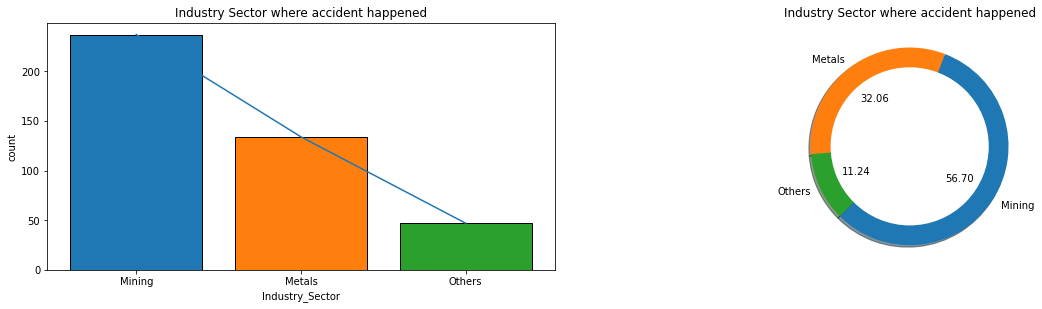

In [24]:
plot('Industry_Sector', 'Industry Sector where accident happened', 'tab10', 'black')

* We can observe that mining industries witness more accidents (~56%)
* Metals sector contributes half of the mining sector(~33%)
* Other Sectors have least contribution (~12%)

#### Gender

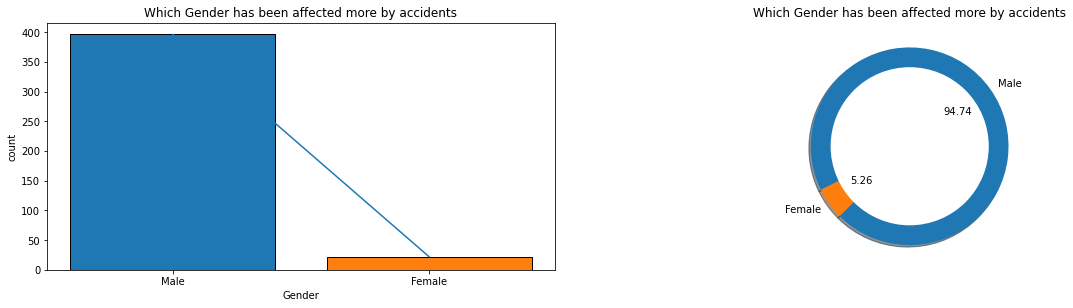

In [25]:
plot('Gender', 'Which Gender has been affected more by accidents', 'tab10', 'black')

* We can observe that this feature is highly imbalanced.
* The dataset is either biased towards Male employees or more men are employed in these industries.
* we might need upsampling in this feature.

#### Employee type

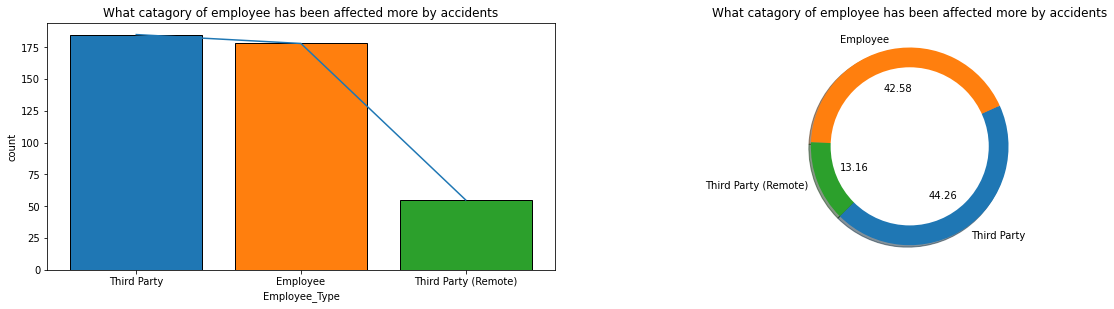

In [26]:
plot('Employee_Type', 'What catagory of employee has been affected more by accidents', 'tab10', 'black')

* This feature is moderately imbalanced.
* Total number of Direct Employees and Third party employees are almost same, However, Third party remote employees are fewer in number.

#### Country

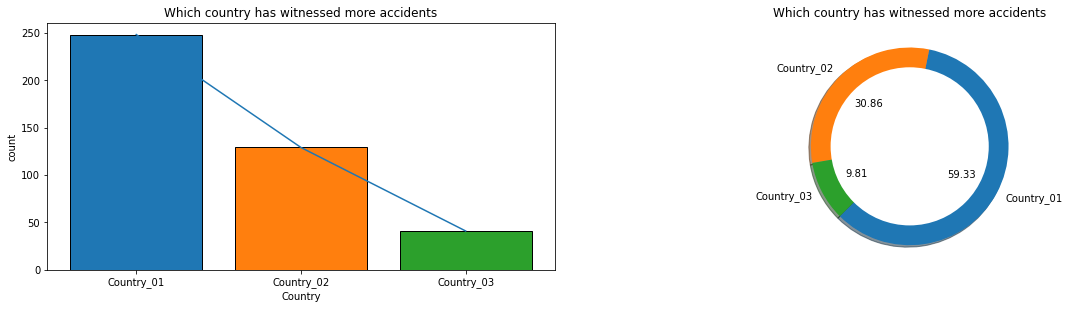

In [27]:
plot('Country', 'Which country has witnessed more accidents', 'tab10', 'black')

* This feature is also highly imbalanced.
* Total number of accidents are more in county 01 followed by countries 02 and 03.

#### Accident Level

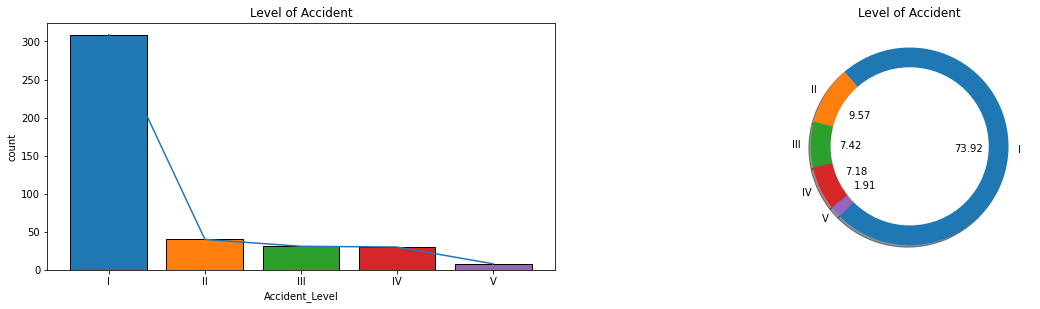

In [28]:
plot('Accident_Level', 'Level of Accident', 'tab10', 'black')

* This features is also looking imbalanced. That may be due to the fact that less severe accidents are most frequent whereas more severe accidents are not that common.
* Level I signifies not severe(common occurences) and V signifies very severe(rare occurences).

#### Potential Accident Level

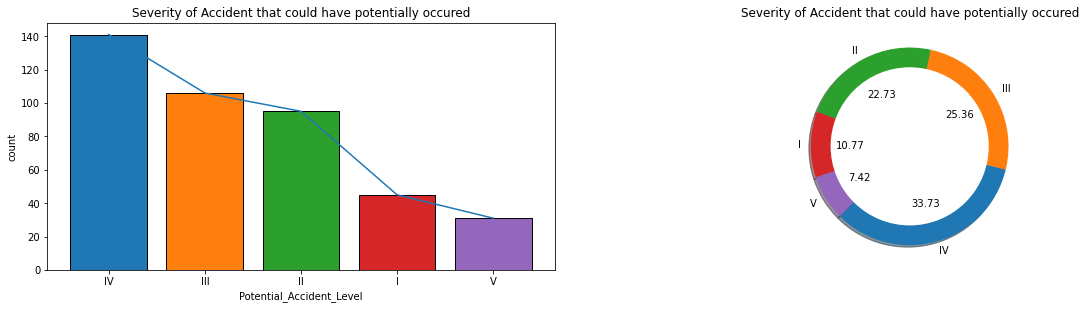

In [29]:
plot('Potential_Accident_Level', 'Severity of Accident that could have potentially occured', 'tab10', 'black')

* Potential accident level indicates how severe the accident could been due to other factors involved in the accidents.
* Potential accident level IV has the highest count and signifies the moderate severity accidents.
* We have to check the correlation of Potential Accident level and Accident level.

#### Local

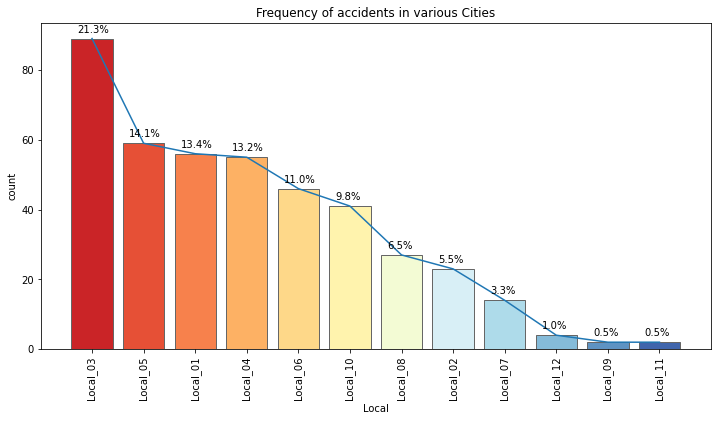

In [30]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = idf['Local'], order=idf['Local'].value_counts().index, palette = 'RdYlBu', edgecolor='.4', saturation=1);
sns.lineplot(idf['Local'].value_counts().index, idf['Local'].value_counts().values)

plt.title('Frequency of accidents in various Cities');
plt.xticks(rotation = 'vertical');

total = sum(idf['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                (p.get_x(), p.get_height()),
                 size=10,
                 xytext = (6,6), 
                 textcoords = 'offset points')

* Local_03 has recorded maximum number of accidents which is approx 21% of all the plants in the country.
* This is followed by Local-05, Local-01 and so on.

In [31]:
# Creating a function to make univariate plots for analysis
def plotunivariate(col, title,x,y,offset_x,offset_y):

    plt.figure(figsize = (x,y))
    ax = sns.countplot(x = idf[col], order=idf[col].value_counts().sort_values(ascending = False).index, palette = 'RdYlBu');
    plt.title(title);
    plt.xticks(rotation = 'vertical');

    total = sum(idf[col].value_counts())
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=9,
                 xytext = (offset_x,offset_y), 
                 textcoords = 'offset points')

#### Critical Risk

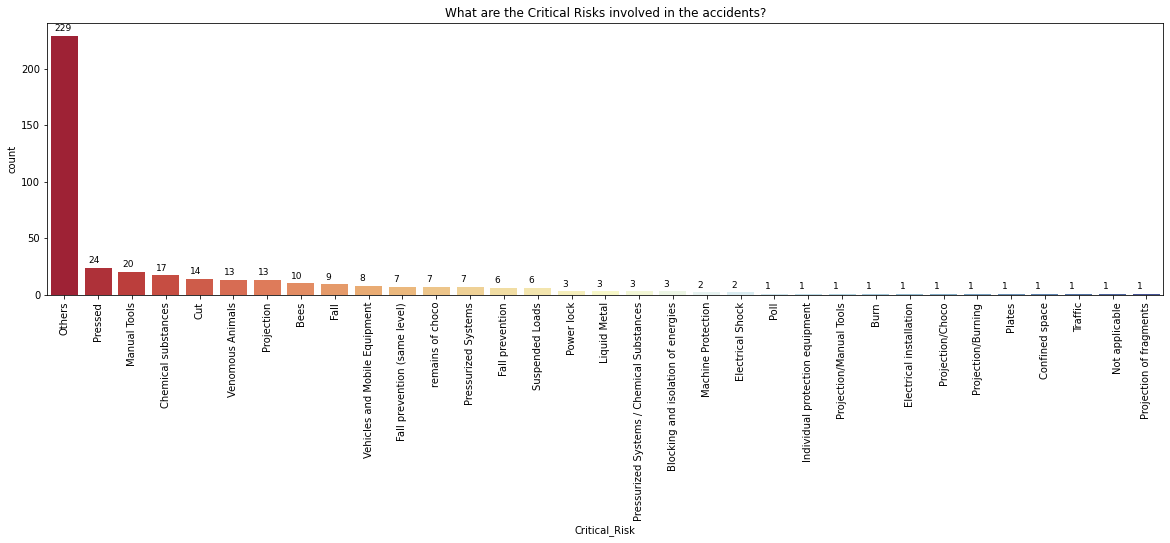

In [32]:
plotunivariate('Critical_Risk','What are the Critical Risks involved in the accidents?',20,5,4,5)

* Most of the Critical Risks are classified as 'Others' that is almost 50% of the dataset, hence there are too many risks need to be classified precisely.
* This is followed by Pressed, Manual tools, Chemical substances, Cut etc..


#### Month

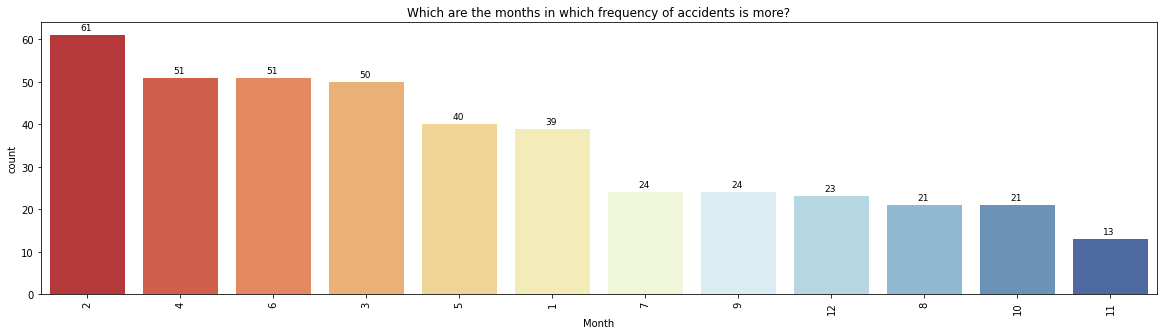

In [33]:
plotunivariate('Month','Which are the months in which frequency of accidents is more?',20,5,30,5)

* Number of accidents are high in beginning of the year and it keeps decreasing later.

#### Year

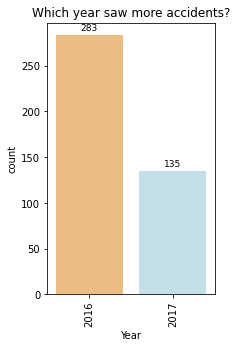

In [34]:
plotunivariate('Year','Which year saw more accidents?',3,5,25,5)

* There were high number of accidents in 2016 as compared to 2017.

#### Day of Month

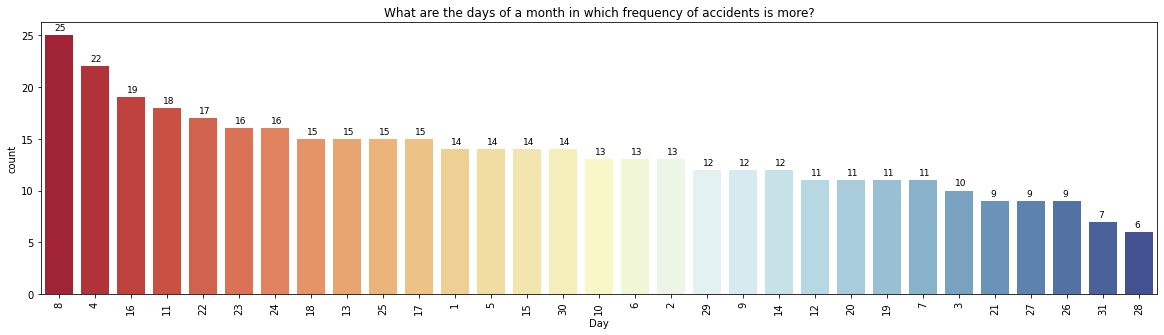

In [35]:
plotunivariate('Day','What are the days of a month in which frequency of accidents is more?',20,5,10,5)

* Number of accidents are very high in particular days like 4, 8 and 16 in every month.

#### Day of Week

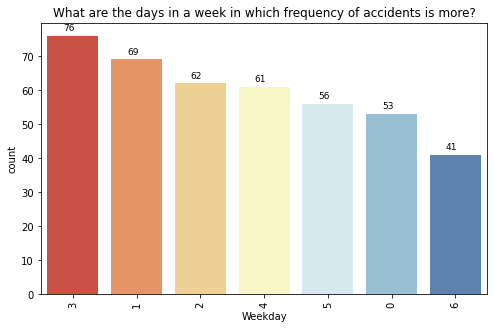

In [36]:
plotunivariate('Weekday','What are the days in a week in which frequency of accidents is more?',8,5,16,5)

* Number of accidents increased at the start and during the middle of the week and declined at the end of the week.

<a id="bivariate-analysis"></a>
### Bivariate Analysis

#### Potential Accident level counts grouped by Country

In [37]:
# Creating a function to make bivariate plots for analysis
def plotbivariate(col1,col2,hue,title,x,y):
    plt.figure(figsize=(x,y))
    ax = sns.countplot(idf[col1], hue=idf[col2], hue_order=idf[hue].value_counts().sort_index().index, palette='Set2', edgecolor='1.0', saturation=1)

    total = sum(idf[col1].value_counts())
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), 
                    (p.get_x(), p.get_height()),
                     size=12,
                     xytext = (0, 3), 
                     textcoords = 'offset points')

    plt.title(title);
    plt.ylabel('Count');
    plt.legend(loc='upper right')

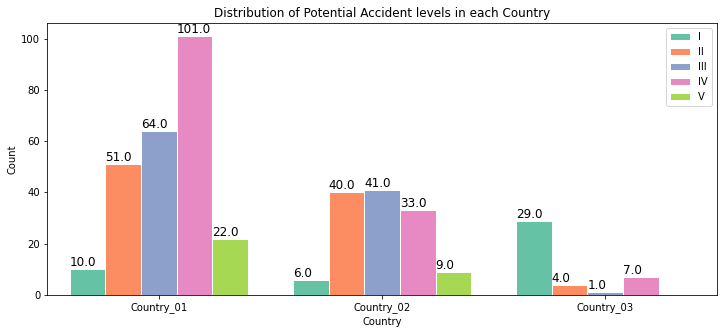

In [38]:
plotbivariate('Country','Potential_Accident_Level','Potential_Accident_Level',
              'Distribution of Potential Accident levels in each Country',12,5)

* Country_01 has more severe accidents.
* Country_02 has moderate accidents across all the levels
* Country_03 minor accidents are more compared to Country_01 and Country_02 but less severe accidents.

#### Potential Accident level counts grouped by City (Local)

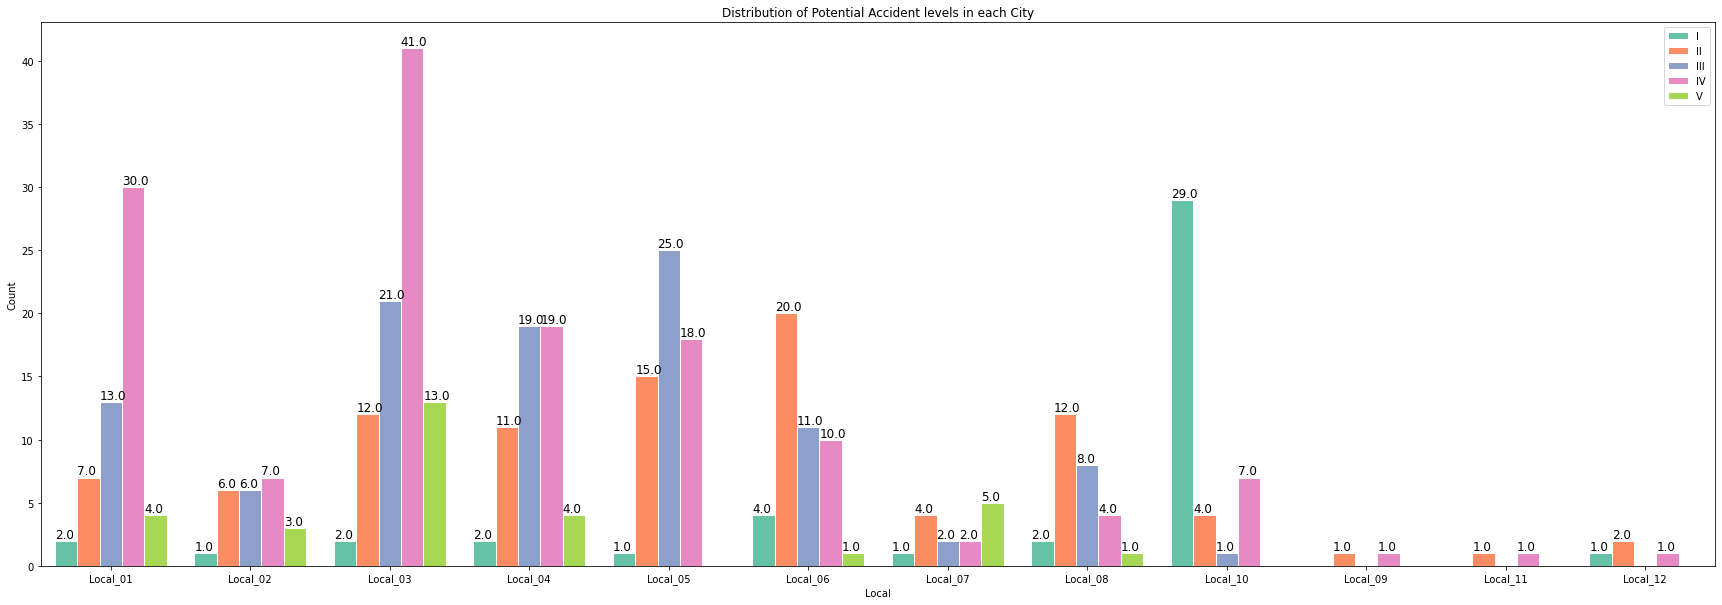

In [39]:
plotbivariate('Local','Potential_Accident_Level','Potential_Accident_Level',
              'Distribution of Potential Accident levels in each City',30,10)

* Local_03 is the city is where most of the accidents happen
* Local_09, Local_11, Local_12 don't experience as many accidents.

#### Potential Accident level counts grouped by Industry Sector


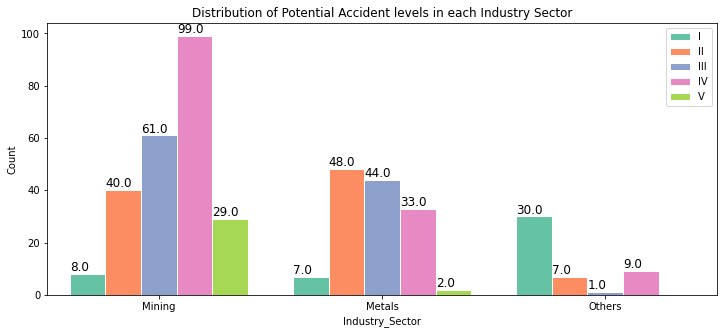

In [40]:
plotbivariate('Industry_Sector','Potential_Accident_Level','Potential_Accident_Level',
              'Distribution of Potential Accident levels in each Industry Sector',12,5)

* Out of all industries, Mining Industry has most accidents.
* This is followed by Metal industry and Others.
* Severity levels of the accidents are more in Mining Industry

#### Potential Accident level counts by Employee Type

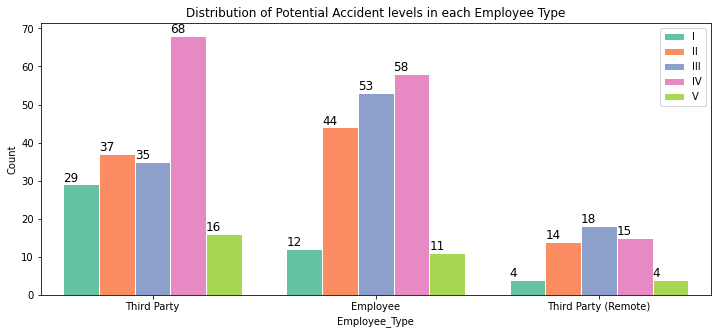

In [41]:
plotbivariate('Employee_Type','Potential_Accident_Level','Potential_Accident_Level',
              'Distribution of Potential Accident levels in each Employee Type',12,5)

* Third Party Employees are more involved in Accidents
* Third Party accidents are also more severe.
* Third party remote have the least accidents (including severe ones)

#### Potential Accident level counts by Critical Risk

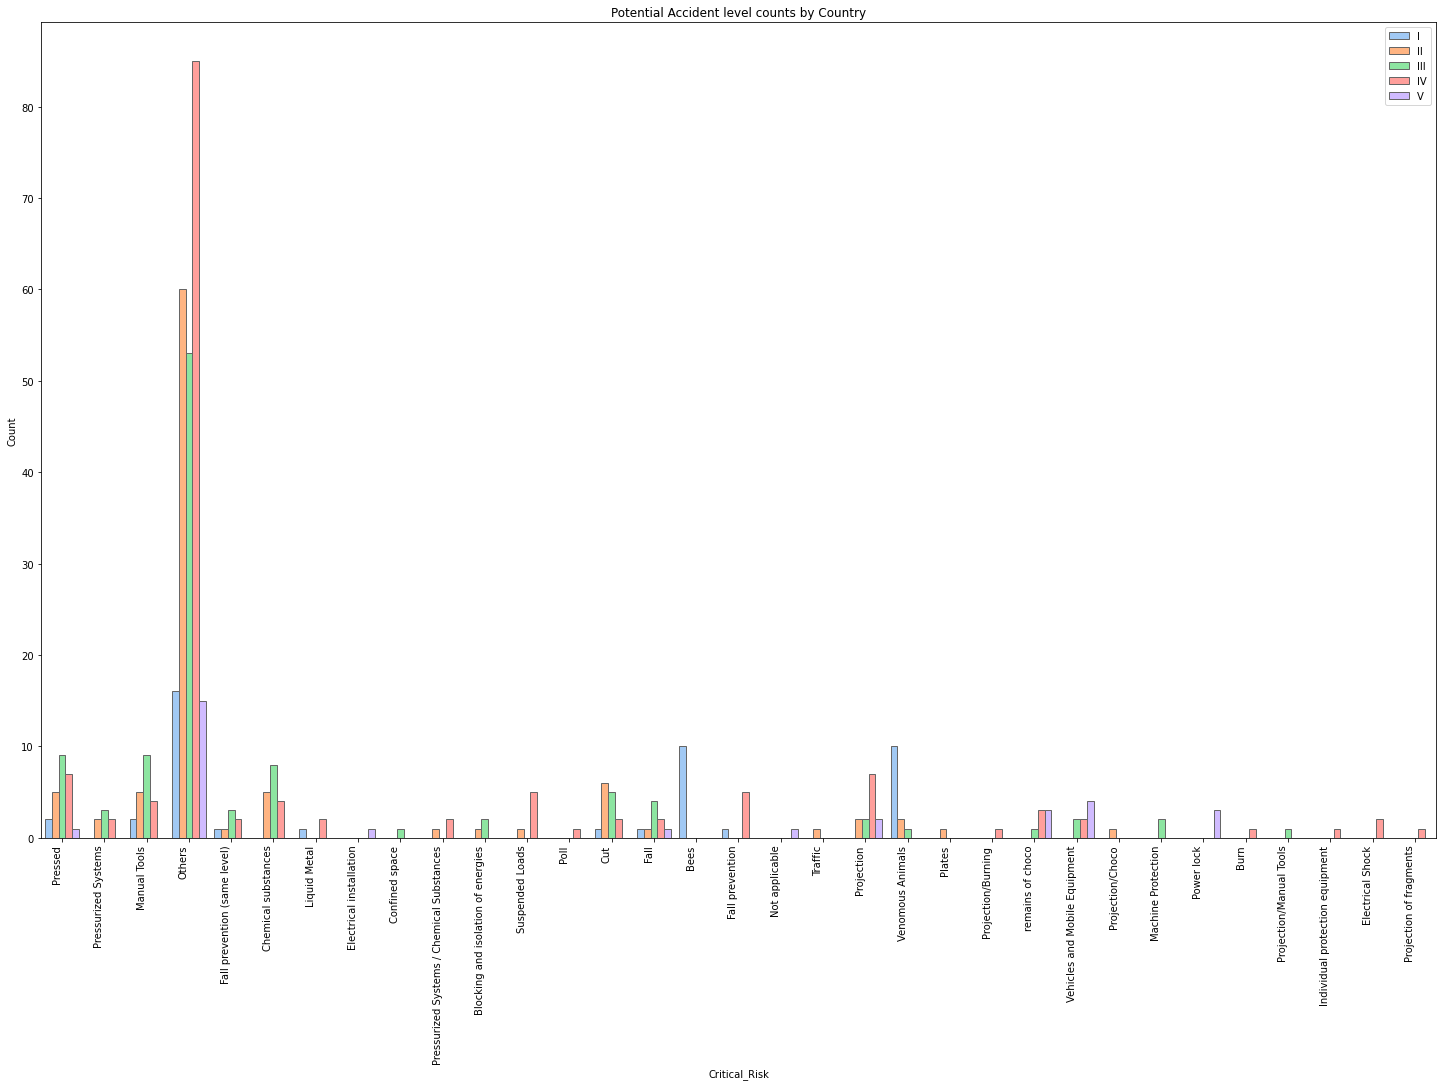

In [42]:
plt.figure(figsize=(25,15))
ax = sns.countplot(idf['Critical_Risk'], hue=idf['Potential_Accident_Level'], hue_order=idf['Potential_Accident_Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Potential Accident level counts by Country');
plt.ylabel('Count');
plt.legend(loc='upper right')

#### Potential Accident level counts with respect to Gender

*Since Gender is more biased towards male, we will take the count based on the percentages.*

In [43]:
# Filtering the dataframe by Gender and Employee type and taking the count.
df_gender = idf.groupby(['Gender','Potential_Accident_Level'])['Potential_Accident_Level'].count()

df_gender = df_gender.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index() 
df_gender = pd.melt(df_gender, ['Gender']).fillna(0)
df_gender

,Gender,Potential_Accident_Level,value
0,Female,I,0.0000000
1,Male,I,11.0000000
2,Female,II,64.0000000
3,Male,II,20.0000000
4,Female,III,14.0000000
5,Male,III,26.0000000
6,Female,IV,18.0000000
7,Male,IV,35.0000000
8,Female,V,5.0000000
9,Male,V,8.0000000


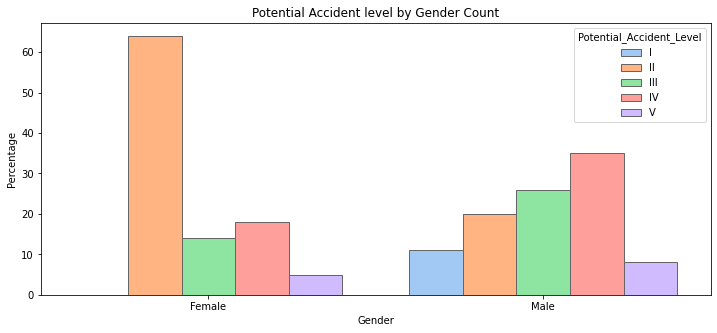

In [44]:
plt.figure(figsize=(12,5))
sns.barplot(df_gender['Gender'], df_gender['value'], hue=df_gender['Potential_Accident_Level'], palette='pastel', edgecolor='.4', saturation=1);
plt.title('Potential Accident level by Gender Count');
plt.ylabel('Percentage');

* Males are more involved in Severe Accidents whereas Females face more number of low severity accidents.

In [45]:
# Getting the value counts of each of the columns
accident = idf['Accident_Level'].value_counts()
potential = idf['Potential_Accident_Level'].value_counts()

# Merging both values of the dataframe
acc_pot = pd.concat([accident, potential], axis=1,sort=False).fillna(0).reset_index()

acc_pot = pd.melt(acc_pot, ['index'], var_name='Accident type', value_name='count')
acc_pot

,index,Accident type,count
0,I,Accident_Level,309
1,II,Accident_Level,40
2,III,Accident_Level,31
3,IV,Accident_Level,30
4,V,Accident_Level,8
5,I,Potential_Accident_Level,45
6,II,Potential_Accident_Level,95
7,III,Potential_Accident_Level,106
8,IV,Potential_Accident_Level,141
9,V,Potential_Accident_Level,31


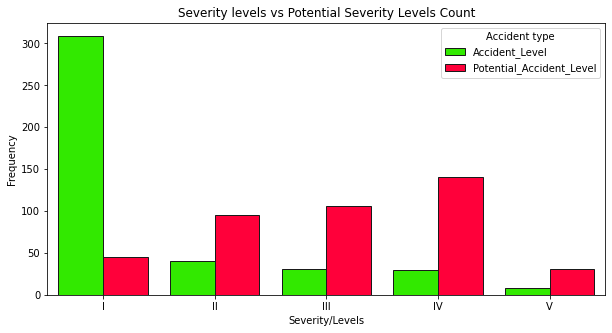

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(acc_pot['index'], acc_pot['count'], hue=acc_pot['Accident type'], palette='prism', edgecolor='.1', saturation=1)
plt.title('Severity levels vs Potential Severity Levels Count');
plt.xlabel('Severity/Levels');
plt.ylabel('Frequency');

* Notice there is a significant difference between the severity of an incident, and the potential severity of the incident.
* If the number of accidents increases, the potential accident level decreases
* There are high number of the Level 1 accidents.
* If the Accident level increases, the potential accident level also increases

#### Bivariate Analysis between the independent variables

#### Accidents Count by Country and City

<Figure size 864x360 with 0 Axes>

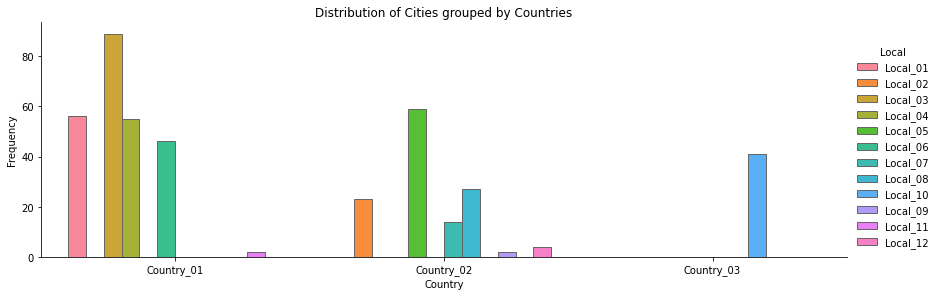

In [47]:
plt.figure(figsize=(12,5))
sns.catplot(data=idf, kind='count', x='Country', hue='Local', size=4, aspect=3, edgecolor='.4', saturation=1);
plt.title('Distribution of Cities grouped by Countries');
plt.ylabel('Frequency');

* Maximum number of accidents occur in Country_01 and the locality Local_03 has the highest number in this country
* Country_03 has just one city Local_10 that has a moderate number of accidents.
* Country_02 has cities with few accidents (except Local_05) but overall number is moderate.

#### Accidents Count by Industry Sector and Local

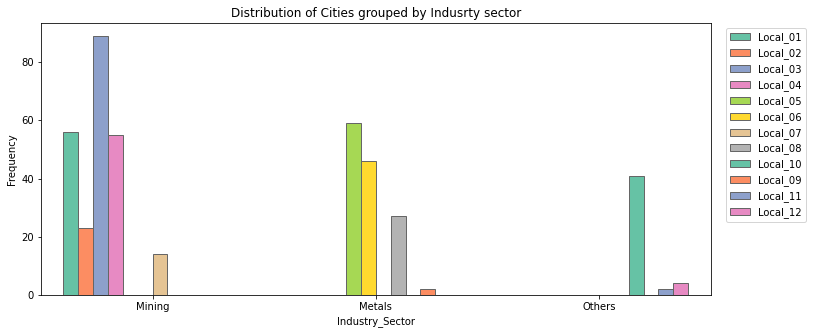

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(idf['Industry_Sector'], hue=idf['Local'], edgecolor='.4', saturation=1, palette='Set2');
plt.title('Distribution of Cities grouped by Indusrty sector');
plt.ylabel('Frequency')
plt.legend(loc='best', bbox_to_anchor=(1.15, 1))

*   Cities Local_01,Local_02,Local_03,Local_04 and Local_07 belong to Mining Sector.
*   Cities Local_05,Local_06,Local_08 and Local_09 belong to Metal Sector.
*   Cities Local_10, Local_11 and Local_12 belong to Other Sectors.

#### Employee type by Gender Count
###### Since Gender is more biased towards male, we are taking ratio count with respect to other variables

In [49]:
# Filtering the dataframe by Gender and Employee type and taking the count.
df1 = idf.groupby(['Gender','Employee_Type'])['Employee_Type'].count()

df1 = df1.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index() 
df1 = pd.melt(df1, ['Gender']) # melt() function unpivots a DataFrame from wide format to long format
df1

,Gender,Employee_Type,value
0,Female,Employee,36.0000000
1,Male,Employee,43.0000000
2,Female,Third Party,41.0000000
3,Male,Third Party,44.0000000
4,Female,Third Party (Remote),23.0000000
5,Male,Third Party (Remote),13.0000000


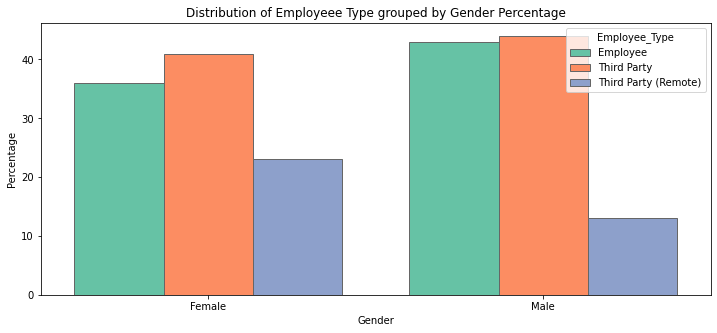

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(df1['Gender'], df1['value'], hue=df1['Employee_Type'], palette='Set2', edgecolor='.4', saturation=1);
plt.title('Distribution of Employeee Type grouped by Gender Percentage');
plt.ylabel('Percentage');

* Division of employee_type in men and women is almost same
* As seen in the above plots third party empoloyees are slightly higher than the employee count in both of the sectors(men&women)
* Proportion of female third party remote employee is moderately higher than that of the males

#### Industry Sector by Gender Count

In [51]:
# Filtering the dataframe by Gender and Employee type and taking the count.
df1 = pd.melt(idf.groupby(['Gender','Industry_Sector'])['Industry_Sector'].count().unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index(),['Gender'])
df1

,Gender,Industry_Sector,value
0,Female,Metals,59.0000000
1,Male,Metals,31.0000000
2,Female,Mining,23.0000000
3,Male,Mining,59.0000000
4,Female,Others,18.0000000
5,Male,Others,11.0000000


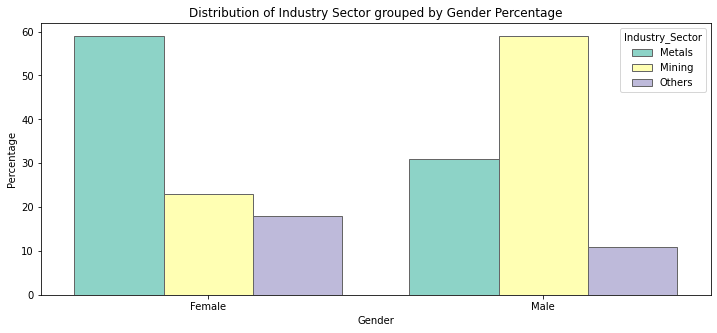

In [52]:
plt.figure(figsize=(12,5))
sns.barplot(df1['Gender'], df1['value'], hue=df1['Industry_Sector'], palette='Set3', edgecolor='.4', saturation=1);
plt.title('Distribution of Industry Sector grouped by Gender Percentage');
plt.ylabel('Percentage');

* There is a major diferrence in mining and metals industries within males and females
* We can observe the distinct safety levels by the industry sectors towards male and female

#### Critical Risk counts by Gender Count

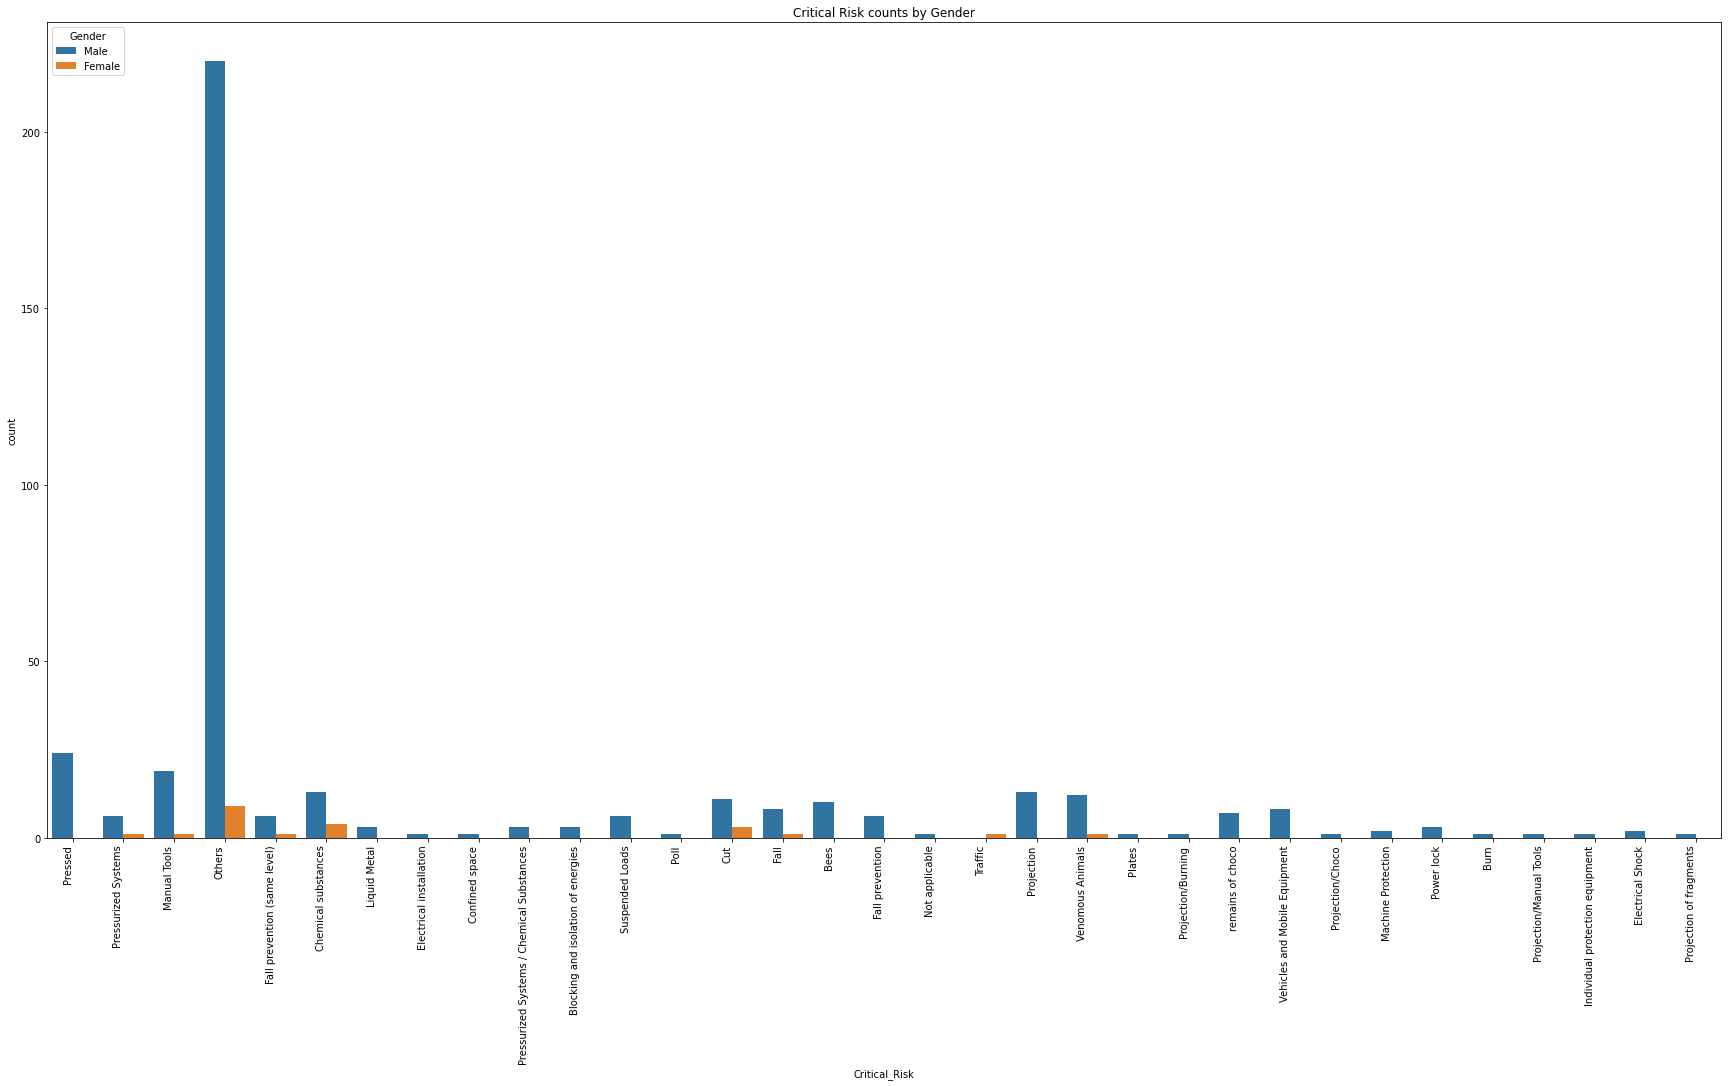

In [53]:
plt.figure(figsize=(30,15))
ax = sns.countplot(idf['Critical_Risk'], hue=idf['Gender'], palette='tab10')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Critical Risk counts by Gender');

* There are some amount of females who involved in Critical Accident Risks such as Chemical Substances, Cut, Fall and also some in Others category.
* Men have more risks in Pressed, Chemical Substances, Projection, Cut, Fall, Bees, Venomous Animals and most in the Others category.

<a id="data-correlation"></a>
### Correlation plot

**Correlation Plot for all Categorical Variables**

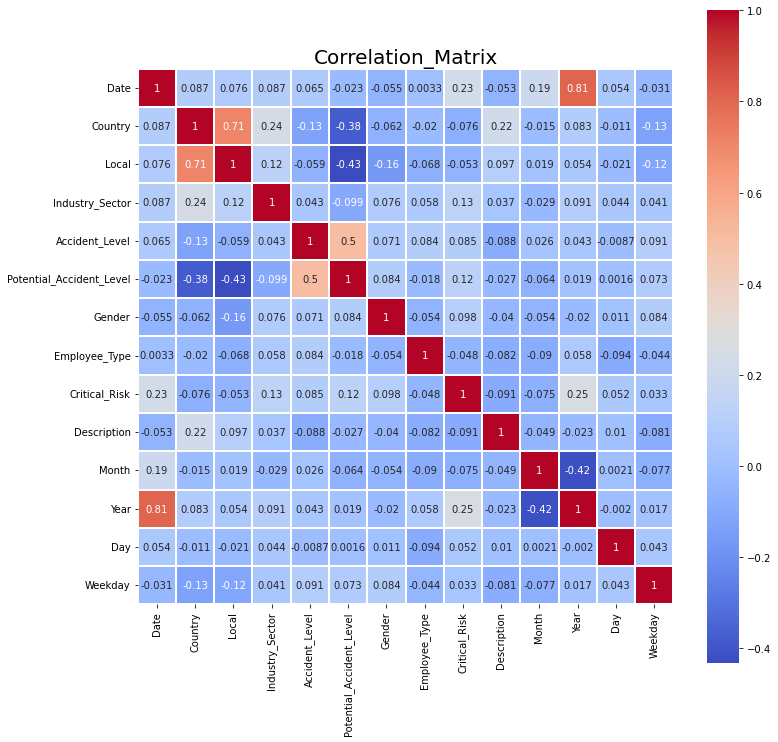

In [54]:
le = LabelEncoder()
df_enc = idf.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_enc.corr(), square=True, cmap='coolwarm', annot=True, linewidth=0.2);

**Correlation Plot of Accidents grouped by Accident Level and Potential accident level**

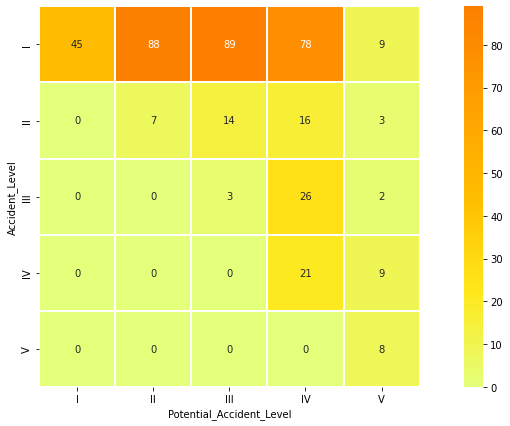

In [55]:
plt.figure(figsize = (16,7))
sns.heatmap(pd.crosstab(idf.Accident_Level, idf.Potential_Accident_Level), square=True, cmap='Wistia', annot=True, linewidth=0.1);

* Accident_Level I is highly positively correlated with most of the Potential_Accident_Levels which indicates minor incidents have the potential to cause severe accident levels in an industry.
* There is a moderate or low correleation among the rest of the Levels of both variables.

<a id="timeseries-analysis"></a>
### Time Series Analysis

#### Accident Level counts by Year

Text(0.5, 1.0, 'Number of Accidents/Day (all countries)')

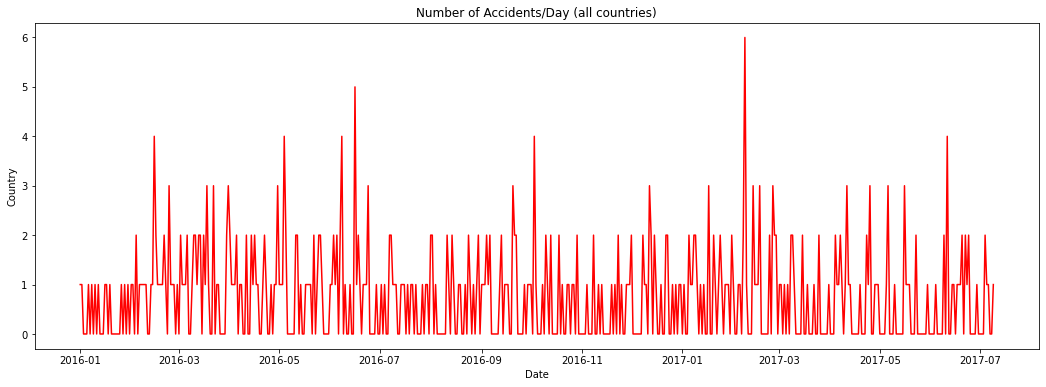

In [56]:
# Basic trend plot accumulating accidents of all the countries day wise
idf.set_index('Date', inplace=True)
df1= idf.Country.resample('24H').count()
                        
plt.figure(figsize=(18,6))
sns.lineplot(x = df1.index, y = df1, color='red')
plt.title('Number of Accidents/Day (all countries)')

* It can be noticed that there are multiple peaks of accidents every year. There is a high peak in February of 2017


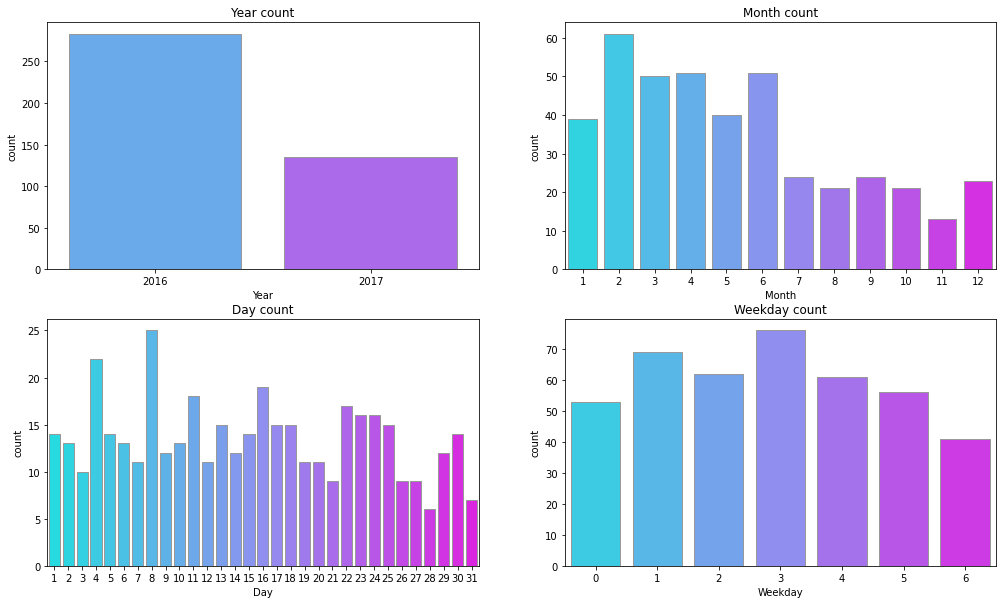

In [57]:
k=1
plt.figure(figsize=(17,10))

for col in idf[['Year', 'Month', 'Day', 'Weekday']]:
    plt.subplot(2,2,k)
    sns.countplot(idf[col], palette='cool',edgecolor = '.6', alpha = 1.0)
    plt.title(col+' count')
    k=k+1

* It can be observed that more number of accidents occured in 2016 compared to 2017, in year 2016 we have all 12 months of data whereas year 2017 has only 7 months of data.
* It seems that the number of accidents decreased in latter of the year / month.
* The number of accidents increased during the middle of the week and declined since the middle of the week.

### Potential Accident level counts by Month



Text(0.5, 0, 'Month')

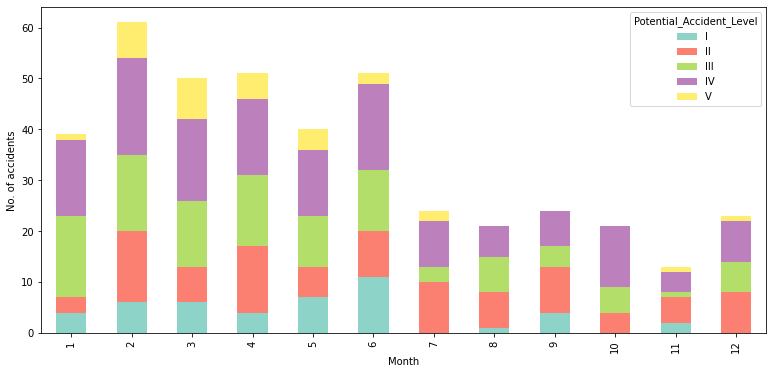

In [58]:
ct = pd.crosstab(columns=idf["Potential_Accident_Level"],index=idf["Month"])
ax = ct.plot(kind="bar",stacked=True,figsize=(13,6),colormap='Set3')
ax.set_ylabel('No. of accidents')
ax.set_xlabel('Month')

* Accident level have the tendency that non-severe levels(I,II) decreased throughout the year but severe(III, IV) levels did not change much.
* Initial months see more accidents which seem to decrease by year end
* High level accidents(V) occur in the initial months

In [59]:
# Removing the columns which are not required for modelling
idf = idf.reset_index()
idf.drop(columns=['Date', 'Day', 'Weekday', 'Year', 'Month'], inplace= True)

<a id="eda-summary"></a>
### EDA Summary:

**Local**
* Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.

**Country**
* Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.

**Industry Sector**
* Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.

**Country + Industry Sector**
* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country.

**Accident Levels**
* The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

**Gender**
* There are more men working in this industry as compared to women.

**Employee type**
* 44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.

**Gender + Employee type**
* Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and 
own employees in each gender is not equal.

**Gender + Industry Sector**
* Proportion of Metals, Mining and Others sector employees in each gender is not equal

**Gender + Accident Levels**
* Males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.

**Accident Levels + Employee type**
* For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be 
slightly higher at high accident levels.

**Accident Levels + Calendar**
* Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.
* Number of accidents are very high in particular days like 4, 8 and 16 in every month.
* Number of accidents increased during the middle of the week and declined towards the end of the week.


**Critical Risk**
* Most of the critical risks are classified as Others.

<a id="nlp-preprocessing"></a>
## 7. NLP Pre-Processing

Let us first check out a few random description columns.

In [60]:
print('~~~'*30); print('Checking 5 random Descriptions and Accident Levels from the data'); print('~~~'*30)
indexes = list(idf.loc[idf['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, accident_levels = list(idf.loc[rands, 'Description']), list(idf.loc[rands, 'Accident_Level'])

_ = [print(f'Description: {description}\nAccident_Level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Checking 5 random Descriptions and Accident Levels from the data
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Description: Project of Vazante that carried out sediment collection of current in the South of Mata target, in the drainage of Serra do Garrote. team that was composed of 04 members of the WCA company, being the S.r.s Leandro, and Jehovânio. they were moving from one collection point to another, inside a shallow drainage, they saw the bee carton, the reaction was to move away from the box as quickly as possible to avoid the stings, they ran about 50 meters, looking for a safe area, to exit the radius of attack of the bees, but the S.S. and Breno), were attacked and consequently they suffered 02 stings, in the belly and Jehovah in the hand, verified that there was no type of allergic reaction, returned with the normal activities.
Accident_Leve

#### Few of the NLP pre-processing steps taken before applying model on the data

- Lemmatization
- Removing stop words that are not in English
- Normalize text
- Converting to lower case
- Remove non-alphanumeric characters
- Removing punctuations


In [61]:
# Defining a function for NLP preprocessing
def cleaning(text):

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    # Also convert to lower case
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets from the text
    words = re.sub('[^a-zA-Z\"\'\s]', ' ', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    words = [w for w in lems if len(w)>2]

    return words

In [62]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [63]:
# Apply all the preprocessing techniques we have defined on Description columns
tokens = cleaning(' '.join(idf['Description'].sum().split()))

In [64]:
# Verifying by printing first 25 words
print('Length of all the words:', len(tokens),'\n')
print('Length of unique tokens in the dataset:', len(np.unique(tokens)),'\n')

Length of all the words: 13273 

Length of unique tokens in the dataset: 2756 



In [65]:
idf['NewDescription'] = idf.apply(lambda x: " ".join(cleaning(x.Description)), axis=1)

**Let us now compare the old and new description (after preprocessing) of a random record**

In [66]:
print('~~~'*10); print('Old Description'); print('~~~'*10)
print(idf['Description'][10])

print('~~~'*10); print('\n\nNew Description'); print('~~~'*10)
print(idf['NewDescription'][10])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Old Description
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
While installing a segment of the polyurethane pulley protective lyner - 60x4x5cm weighing 1.2 kg - on the head pulley of the ore winch, when the pulley is rotated to compress the lyner inside the channel, it falls from its housing 1.50 m rubbing the right side of the worker's hip, generating the injury described.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


New Description
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
installing segment polyurethane pulley protective lyner weighing head pulley ore winch pulley rotated compress lyner inside channel fall housing rubbing right side worker's hip generating injury described


**We can observe that:**
- The capital letters have been changed to lower case.
- The punctuation marks have been removed.
- The digits have been removed.
- Apostropes are retained
- The common words such as prepositions and articles etc. have been removed.
- Measurement metrices such as kg and m have been removed.
- Plural words have been changed to singular.
- Only words which prvide some insight on the incident have been retained.


##### We will now attempt to include the Critical Risk as a part of the description to give more insight of the accident.

In [67]:
# Apply all the preprocessing techniques we have defined on Critical Risk columns
critical_tokens = cleaning(' '.join(idf['Critical_Risk'].sum().split()))

idf['Processed_Critical_Text'] = idf.apply(lambda x: " ".join(cleaning(x.Critical_Risk)), axis=1)

In [68]:
idf['Processed_Critical_Text']  = idf['NewDescription'] + " " +idf["Processed_Critical_Text"]

In [69]:
print('~~~'*10); print('Old Description'); print('~~~'*10)
print(idf['Description'][10])

print('~~~'*10); print('\n\nNew Description'); print('~~~'*10)
print(idf['Processed_Critical_Text'][10])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Old Description
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
While installing a segment of the polyurethane pulley protective lyner - 60x4x5cm weighing 1.2 kg - on the head pulley of the ore winch, when the pulley is rotated to compress the lyner inside the channel, it falls from its housing 1.50 m rubbing the right side of the worker's hip, generating the injury described.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


New Description
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
installing segment polyurethane pulley protective lyner weighing head pulley ore winch pulley rotated compress lyner inside channel fall housing rubbing right side worker's hip generating injury described others


In [70]:
# Get length of each line
idf['nb_words'] = idf['Processed_Critical_Text'].apply(lambda x: len(x.split(' ')))

In [71]:
print('--'*30); print('Five point summary for number of words')
display(idf['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(idf['nb_words'].quantile(0.99)));print('--'*30)

print('Minimum number of words: {}'.format(idf['nb_words'].min()))
print('Maximum number of words: {}'.format(idf['nb_words'].max()))

------------------------------------------------------------
Five point summary for number of words


count    418
mean      33
std       15
min       10
25%       22
50%       30
75%       41
max       94
Name: nb_words, dtype: int32

99% quantilie: 76.82999999999998
------------------------------------------------------------
Minimum number of words: 10
Maximum number of words: 94


<a id="ngram"></a>
### N-grams

In [72]:
# Function to calculate ngrams
def extract_ngrams(data, num):
    # Taking ngrams on Description column text and taking the value counts of the 30 most common words
    words_with_count  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(30)

    # Creating the dataframe of the words and their counts
    words_with_count = pd.DataFrame(words_with_count, columns=['Words', 'Count'])
    words_with_count.Words = [' '.join(i) for i in words_with_count.Words]
    words_with_count.set_index('Words', inplace=True) # setting the Words as index

    # Returns the dataframe which contains unique tokens ordered by their counts 
    return words_with_count

#### Unigram

In [73]:
uni_grams = extract_ngrams(tokens, 1)
uni_grams[0:10]

,Count
Words,
hand,173
causing,166
employee,163
left,155
right,154
operator,127
activity,117
time,112
injury,108


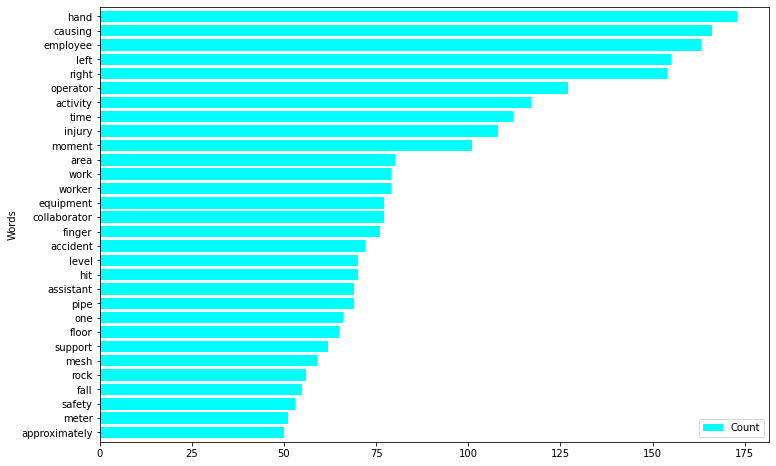

In [74]:
# Visualising the unigram
uni_grams.sort_values(by='Count').plot.barh(color = 'cyan', width = 0.8, figsize = (12,8));

* Causing is the most frequent word. 
* There are several nouns like pipe, collaborator, time etc. 
* Most accidents involved the hands of the persons involved.
* Moreover there are other words which depict some sort of action (verbs). For example hit, remove, fall move...etc

#### Bigram

In [75]:
bi_grams = extract_ngrams(tokens, 2)
bi_grams[0:10]

,Count
Words,
left hand,67
right hand,56
causing injury,55
time accident,55
finger left,25
employee report,22
injury described,20
medical center,17
described injury,17


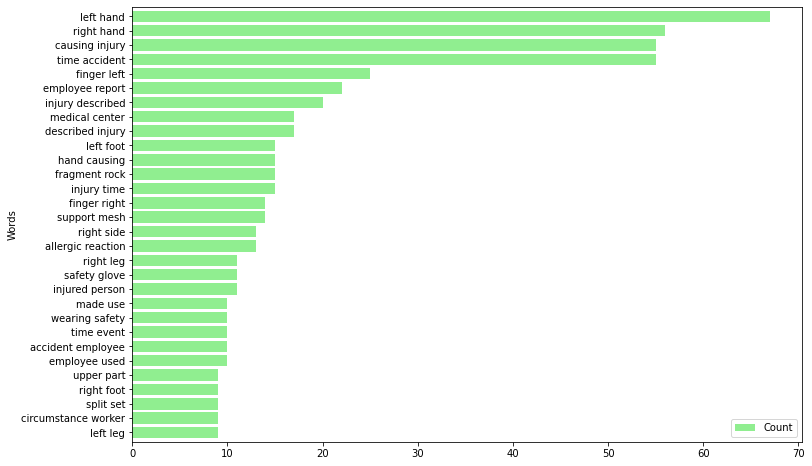

In [76]:
bi_grams.sort_values(by='Count').plot.barh(color = 'lightgreen', width = 0.8, figsize = (12,8));

* There are many phrases which is related to hands. For example hand causing, left hand, right hand, finger left, finger right, middle finger and ring finger.
* There are also some phrases which is related to other body parts. For example left foot and right side.
- Time of accident is also a common theme, which is reported in most descriptions.

#### Trigram

In [77]:
tri_grams = extract_ngrams(tokens, 3)
tri_grams[0:10]

,Count
Words,
finger left hand,22
causing injury described,15
finger right hand,13
injury time accident,13
time accident employee,9
hand causing injury,8
generating described injury,8
described time accident,7
left hand causing,6


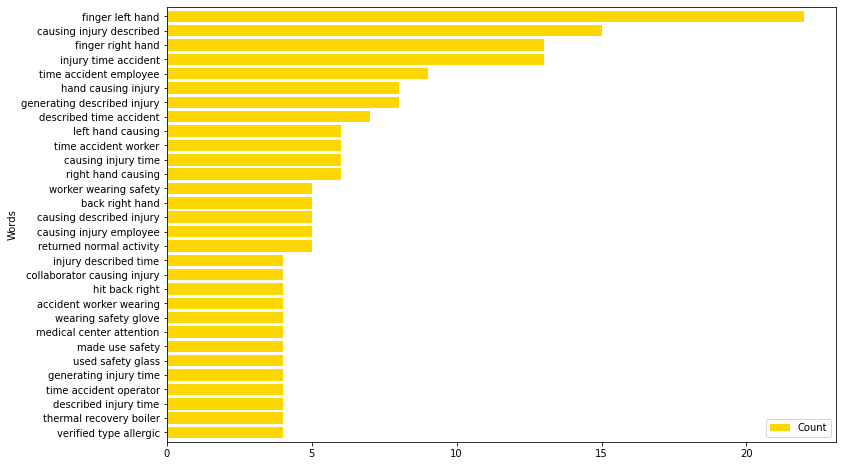

In [78]:
tri_grams.sort_values(by='Count').plot.barh(color = 'gold', width = 0.8, figsize = (12,8));

* Like Unigram and Bigram, there are also many phrases which is related to hands or other body parts, but increasing the grams makes sense
* For example left/right hand finger, left hand causing, hit back right and wearing safety glove.. etc.

<a id="word-cloud"></a>
### Word Cloud

In [79]:
def show_wordcloud(df_wc,title):
    wordcloud = WordCloud(width = 1200, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                          min_font_size=5, max_words=300, collocations=False).generate(" ".join(idf['NewDescription'].values))
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis('off')
    plt.show()

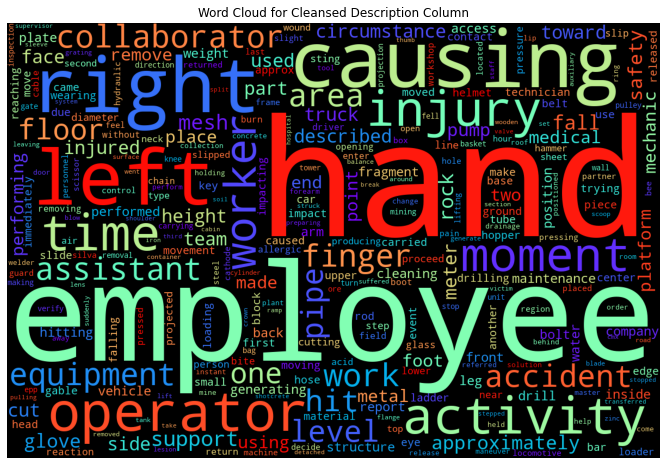

In [80]:
show_wordcloud(idf,"Word Cloud for Cleansed Description Column")

* Same as the Ngram analysis above, there are many hand-related and movement-related words.
* Hand-related: left, right, hand, finger, and glove
* Movement-related: fall, hit, carry, lift and slip

<a id="feature-engineering"></a>
## 8. Feature Engineering

- We will be using Label Encoding on the predefined feature columns that are categorical.
- We will use three different types of Feature Extraction **TFIDF, Glove and CBOW(Continuous Bag OF Words)**
- We will use two different types of Sampling methods **Upsample minority Class using Resample method and SMOTE.** 
- We will then run the most common classifier models on a **Stratified Sampled Dataset** and compare the performances

<a id="label-encoding"></a>
### Label Encoding

In [81]:
# To replace white space everywhere in Employee type
idf['Employee_Type'] = idf['Employee_Type'].str.replace(' ', '_')
idf['Employee_Type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee_Type, dtype: int64

In [82]:
# To replace white space everywhere in Critical Risk
idf['Critical_Risk'] = idf['Critical_Risk'].str.replace('\n', '').str.replace(' ', '_')
idf['Critical_Risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: Critical_Risk, dtype: int64

In [83]:
# Create Industry DataFrame
industry_encoded_df = pd.DataFrame()

# Label encoding
industry_encoded_df['Accident_Level'] = LabelEncoder().fit_transform(idf['Accident_Level']).astype(np.int8)
industry_encoded_df['Potential_Accident_Level'] = LabelEncoder().fit_transform(idf['Potential_Accident_Level']).astype(np.int8)

In [84]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(industry_encoded_df['Accident_Level'])

##### Lets's take a look athe the encoded dataframe

In [85]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(idf['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(idf['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(idf['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(idf['Industry_Sector'], columns=['Industry_Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(idf['Employee_Type'], columns=['Employee_Type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(idf['Critical_Risk'], columns=['Critical_Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe
industry_encoded_df = industry_encoded_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

In [86]:
data = industry_encoded_df[['Accident_Level','Potential_Accident_Level']]
headers = ["Accident_Level", "Potential_Accident_Level"]
industry_features_df = pd.DataFrame() 
industry_features_df = pd.DataFrame(data,columns=headers)

<a id="feature-extraction"></a>
### Feature Extraction

### 1. TFIDF Vectorization

##### We'll be considering the unigram,bigram and trigram for top 30 features only

In [87]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=30, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(idf['Processed_Critical_Text']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

#### Combine TFIDF and Encoded Features

In [88]:
tfidf_df = industry_features_df.join(ind_tfidf_df.reset_index(drop=True))

In [89]:
print('Dataframe Shape: ', tfidf_df.shape)

Dataframe Shape:  (418, 92)


#### Create Training and Test Set for TFIDF

In [90]:
X_tfidf = tfidf_df.drop(['Accident_Level','Potential_Accident_Level'], axis = 1)
y_tfidf = tfidf_df['Accident_Level']

In [91]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size = 0.25, random_state = 1, stratify = y_tfidf)

In [92]:
print('X_train_tfidf shape : ({0},{1})'.format(X_train_tfidf.shape[0], X_train_tfidf.shape[1]))
print('y_train_tfidf shape : ({0},)'.format(y_train_tfidf.shape[0]))
print('X_test_tfidf shape : ({0},{1})'.format(X_test_tfidf.shape[0], X_test_tfidf.shape[1]))
print('y_test_tfidf shape : ({0},)'.format(y_test_tfidf.shape[0]))

X_train_tfidf shape : (313,90)
y_train_tfidf shape : (313,)
X_test_tfidf shape : (105,90)
y_test_tfidf shape : (105,)


### 2. Glove Embedding

In [93]:
embeddings_index = {}
with open("glove.6B.200d.txt", 'r', encoding="utf-8") as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:43, 9184.62it/s] 

Found 400000 word vectors.


In [94]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stopwords.words('english')]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [95]:
ind_glove_df = [sent2vec(x) for x in tqdm(idf['Processed_Critical_Text'])]

100%|████████████████████████████████████████████████████████████████████████████████| 418/418 [00:04<00:00, 84.13it/s]


#### Combine Glove and Encoded Features

##### We'll be considering the top 50 features only

In [96]:
glove_df = industry_features_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:50].reset_index(drop=True))
print('Dataframe Shape: ', glove_df.shape)

Dataframe Shape:  (418, 52)


#### Create Training and Test Set for Glove Ebedding

In [97]:
X_glove = glove_df.drop(['Accident_Level','Potential_Accident_Level'], axis = 1)
y_glove = glove_df['Accident_Level']

In [98]:
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y_glove, test_size = 0.25, random_state = 1, stratify = y_glove)

In [99]:
print('X_train_glove shape : ({0},{1})'.format(X_train_glove.shape[0], X_train_glove.shape[1]))
print('y_train_glove shape : ({0},)'.format(y_train_glove.shape[0]))
print('X_test_glove shape : ({0},{1})'.format(X_test_glove.shape[0], X_test_glove.shape[1]))
print('y_test_glove shape : ({0},)'.format(y_test_glove.shape[0]))

X_train_glove shape : (313,50)
y_train_glove shape : (313,)
X_test_glove shape : (105,50)
y_test_glove shape : (105,)


### 3. CBOW

In [100]:
training = idf['Processed_Critical_Text'].tolist()
training = [sentence.split(' ')  for sentence in training] 

In [101]:
# Converting the words back to the sentence form for modelling
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [102]:
# Build Word to Vector model
model = Word2Vec(sentences=training,
                 min_count =2,
                 sg=0, 
                 vector_size=100)

In [103]:
# The trained word vectors are stored in a KeyedVectors instance, as model.wv
vectors = model.wv.vectors

In [104]:
tokenized_words = [i.split() for i in idf['Processed_Critical_Text']]

wordvec_arrays = np.zeros((len(tokenized_words), 100))

for i in range(len(tokenized_words)):
    wordvec_arrays[i,:] = word_vector(tokenized_words[i], 100)
    
cbow_df = pd.DataFrame(wordvec_arrays)
cbow_df.shape

(418, 100)

#### Combine CBOW and Encoded Features

In [105]:
cbow_df = industry_features_df.join(cbow_df.reset_index(drop=True))
print('Dataframe Shape: ', cbow_df.shape)

Dataframe Shape:  (418, 102)


#### Create Training and Test Set for CBOW

In [106]:
X_cbow = cbow_df.drop(['Accident_Level','Potential_Accident_Level'], axis = 1)
y_cbow = cbow_df['Accident_Level']

In [107]:
X_train_cbow, X_test_cbow, y_train_cbow, y_test_cbow = train_test_split(X_cbow, y_cbow, test_size = 0.25, random_state = 1, stratify = y_cbow)

In [108]:
print('X_train_cbow shape : ({0},{1})'.format(X_train_cbow.shape[0], X_train_cbow.shape[1]))
print('X_test_cbow shape : ({0},)'.format(y_train_cbow.shape[0]))
print('y_train_cbow shape : ({0},{1})'.format(X_test_cbow.shape[0], X_test_cbow.shape[1]))
print('y_test_cbow shape : ({0},)'.format(y_test_cbow.shape[0]))

X_train_cbow shape : (313,100)
X_test_cbow shape : (313,)
y_train_cbow shape : (105,100)
y_test_cbow shape : (105,)


<a id="resampling"></a>
### Resampling Techniques 

#### Oversample minority class

In [109]:
# Display old accident level counts
industry_features_df['Accident_Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident_Level, dtype: int64

In [110]:
def sampler(X_train,y_train): 
    # Concatenate our training data back together
    X_up = pd.concat([X_train, y_train], axis=1)

    # Get the majority and minority class
    acclevel_0 = X_up[X_up['Accident_Level'] == 0]
    acclevel_1 = X_up[X_up['Accident_Level'] == 1]
    acclevel_2 = X_up[X_up['Accident_Level'] == 2]
    acclevel_3 = X_up[X_up['Accident_Level'] == 3]
    acclevel_4 = X_up[X_up['Accident_Level'] == 4]

    # Upsample minority classes
    acclevel_1_up = resample(acclevel_1,replace = True,n_samples = len(acclevel_0),random_state = 1)
    acclevel_2_up = resample(acclevel_2,replace = True,n_samples = len(acclevel_0),random_state = 1)
    acclevel_3_up = resample(acclevel_3,replace = True,n_samples = len(acclevel_0),random_state = 1)
    acclevel_4_up = resample(acclevel_4,replace = True,n_samples = len(acclevel_0),random_state = 1)
    
    # Combine majority class with upsampled minority classes
    df_upsampled = pd.concat([acclevel_0, acclevel_1_up, acclevel_2_up, acclevel_3_up, acclevel_4_up])
    
    return df_upsampled

In [111]:
df_tfidf_up = sampler(X_train_tfidf ,y_train_tfidf)

# Separate input features and target
X_train_tfidf_up = df_tfidf_up.drop(['Accident_Level'], axis = 1)
y_train_tfidf_up = df_tfidf_up['Accident_Level']

print("\n TF-IDF embedding dataset shape before upsampling:",X_train_tfidf.shape)
print("\n TF-IDF embedding dataset shape after upsampling using resample method:",X_train_tfidf_up.shape)


 TF-IDF embedding dataset shape before upsampling: (313, 90)

 TF-IDF embedding dataset shape after upsampling using resample method: (1155, 90)


In [112]:
df_glove_up = sampler(X_train_glove ,y_train_glove)

# Separate input features and target
X_train_glove_up = df_glove_up.drop(['Accident_Level'], axis = 1) 
y_train_glove_up = df_glove_up['Accident_Level']

print("\n Glove embedding dataset shape before upsampling:",X_train_glove.shape)
print("\n Glove embedding dataset shape after upsampling using resample method:",X_train_glove_up.shape)


 Glove embedding dataset shape before upsampling: (313, 50)

 Glove embedding dataset shape after upsampling using resample method: (1155, 50)


In [113]:
df_cbow_up = sampler(X_train_cbow ,y_train_cbow)

# Separate input features and target
X_train_cbow_up = df_cbow_up.drop(['Accident_Level'], axis = 1)
y_train_cbow_up = df_cbow_up['Accident_Level']

print("\n CBOW embedding dataset shape before upsampling:",X_train_cbow.shape)
print("\n CBOW embedding dataset shape after upsampling using resample method:",X_train_cbow_up.shape)


 CBOW embedding dataset shape before upsampling: (313, 100)

 CBOW embedding dataset shape after upsampling using resample method: (1155, 100)


#### SMOTE - Upsample smaller class

In [114]:
def smoteSample(X_train,y_train):
    sm = SMOTE(random_state=1)

    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
    
    return df_smote

In [115]:
df_tfidf_smote = smoteSample(X_train_tfidf ,y_train_tfidf)
# Separate input features and target
X_train_tfidf_smote = df_tfidf_smote.iloc[:,:-1]
y_train_tfidf_smote = df_tfidf_smote.iloc[:,-1:]

print("\n TF-IDF embedding dataset shape before upsampling:",X_train_tfidf.shape)
print("\n TF-IDF embedding dataset shape after upsampling using SMOTE:",X_train_tfidf_smote.shape)


 TF-IDF embedding dataset shape before upsampling: (313, 90)

 TF-IDF embedding dataset shape after upsampling using SMOTE: (1155, 90)


In [116]:
df_glove_smote = smoteSample(X_train_glove ,y_train_glove)
# Separate input features and target
X_train_glove_smote = df_glove_smote.iloc[:,:-1] 
y_train_glove_smote = df_glove_smote.iloc[:,-1:]

print("\n Glove embedding dataset shape before upsampling:",X_train_glove.shape)
print("\n Glove embedding dataset shape after upsampling using SMOTE:",X_train_glove_smote.shape)


 Glove embedding dataset shape before upsampling: (313, 50)

 Glove embedding dataset shape after upsampling using SMOTE: (1155, 50)


In [117]:
df_cbow_smote = smoteSample(X_train_cbow ,y_train_cbow)
# Separate input features and target
X_train_cbow_smote = df_cbow_smote.iloc[:,:-1] 
y_train_cbow_smote = df_cbow_smote.iloc[:,-1:]

print("\n CBOW embedding dataset shape before upsampling:",X_train_cbow.shape)
print("\n CBOW embedding dataset shape after upsampling using SMOTE:",X_train_cbow_smote.shape)


 CBOW embedding dataset shape before upsampling: (313, 100)

 CBOW embedding dataset shape after upsampling using SMOTE: (1155, 100)


<a id="ml-models"></a>
## 9. Design, train and test machine learning classifiers

In [118]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

#### Function to Train and test ML model

In [119]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
        y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
        mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
        model_cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        # Model - Classification report
        model_cr = classification_report(y_test, y_pred)
        print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
        filename = 'finalised_model.sav'
        pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

<a id="lr-comparison"></a>
### Unsampled vs Sampled and Comparisons of Vectorization techniques

#### 1. Logistic Regression with Unsampled TF-IDF Vectors

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


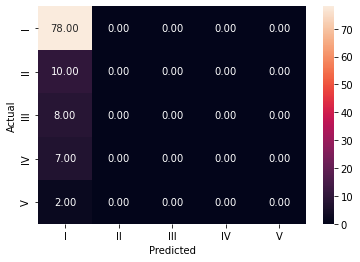

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        78
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.74       105
   macro avg       0.15      0.20      0.17       105
weighted avg       0.55      0.74      0.63       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046


In [120]:
resultsDf = pd.DataFrame()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)                           
resultsDf = train_test_model(lr, 'Logistic Regression: No Sampling + TF-IDF', X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, 'none', 1, 'no', 'yes', 'no')

resultsDf

#### 2. Logistic Regression with Oversampled data & TF-IDF Vectors

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


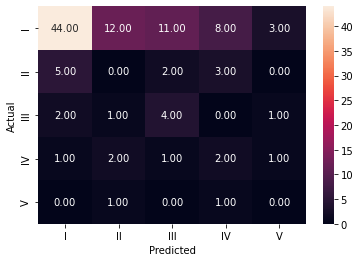

              precision    recall  f1-score   support

           0       0.85      0.56      0.68        78
           1       0.00      0.00      0.00        10
           2       0.22      0.50      0.31         8
           3       0.14      0.29      0.19         7
           4       0.00      0.00      0.00         2

    accuracy                           0.48       105
   macro avg       0.24      0.27      0.24       105
weighted avg       0.66      0.48      0.54       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187


In [121]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)                                           
lr_df = train_test_model(lr, 'Logistic Regression: Upsampling + TF-IDF', X_train_tfidf_up, X_test_tfidf, y_train_tfidf_up, y_test_tfidf, 'none', 2, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

#### 3. Logistic Regression with SMOTE and TF-IDF Vectors

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


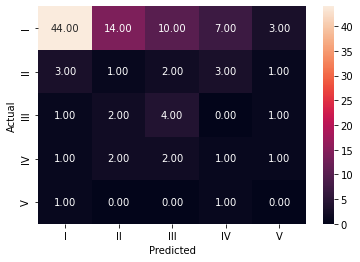

              precision    recall  f1-score   support

           0       0.88      0.56      0.69        78
           1       0.05      0.10      0.07        10
           2       0.22      0.50      0.31         8
           3       0.08      0.14      0.11         7
           4       0.00      0.00      0.00         2

    accuracy                           0.48       105
   macro avg       0.25      0.26      0.23       105
weighted avg       0.68      0.48      0.55       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187
3,Logistic Regression: SMOTE +TF-IDF,0.8415584,0.4761905,0.6812136,0.4761905,0.5477432,1.5005839


In [122]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
lr_smote_df = train_test_model(lr, 'Logistic Regression: SMOTE +TF-IDF', X_train_tfidf_smote, X_test_tfidf, y_train_tfidf_smote, y_test_tfidf, 'none', 3, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

#### 4. Logistic Regression with Unsampled GLOVE Embeddings

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


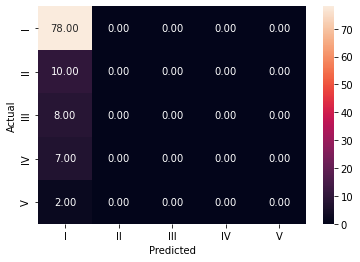

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        78
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.74       105
   macro avg       0.15      0.20      0.17       105
weighted avg       0.55      0.74      0.63       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187
3,Logistic Regression: SMOTE +TF-IDF,0.8415584,0.4761905,0.6812136,0.4761905,0.5477432,1.5005839
4,Logistic Regression: No Sampling + GLOVE,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8774270


In [123]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)                           
lr_glove = train_test_model(lr, 'Logistic Regression: No Sampling + GLOVE', X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'none', 4, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_glove])
resultsDf

#### 5. Logistic Regression with Oversampled data & GLOVE Embeddings

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


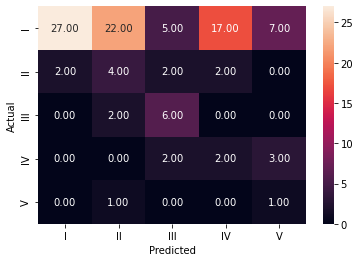

              precision    recall  f1-score   support

           0       0.93      0.35      0.50        78
           1       0.14      0.40      0.21        10
           2       0.40      0.75      0.52         8
           3       0.10      0.29      0.14         7
           4       0.09      0.50      0.15         2

    accuracy                           0.38       105
   macro avg       0.33      0.46      0.31       105
weighted avg       0.74      0.38      0.45       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187
3,Logistic Regression: SMOTE +TF-IDF,0.8415584,0.4761905,0.6812136,0.4761905,0.5477432,1.5005839
4,Logistic Regression: No Sampling + GLOVE,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8774270
5,Logistic Regression: Upsampling + GLOVE,0.6129870,0.3809524,0.7433189,0.3809524,0.4466417,1.4455932


In [124]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)                                           
lr_df = train_test_model(lr, 'Logistic Regression: Upsampling + GLOVE', X_train_glove_up, X_test_glove, y_train_glove_up, y_test_glove, 'none', 5, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

#### 6. Logistic Regression with SMOTE and GLOVE Embeddings

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


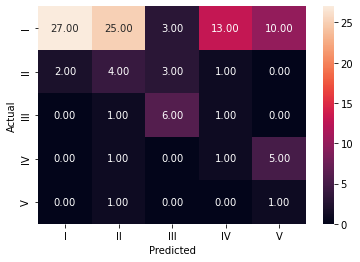

              precision    recall  f1-score   support

           0       0.93      0.35      0.50        78
           1       0.12      0.40      0.19        10
           2       0.50      0.75      0.60         8
           3       0.06      0.14      0.09         7
           4       0.06      0.50      0.11         2

    accuracy                           0.37       105
   macro avg       0.34      0.43      0.30       105
weighted avg       0.75      0.37      0.45       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187
3,Logistic Regression: SMOTE +TF-IDF,0.8415584,0.4761905,0.6812136,0.4761905,0.5477432,1.5005839
4,Logistic Regression: No Sampling + GLOVE,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8774270
5,Logistic Regression: Upsampling + GLOVE,0.6129870,0.3809524,0.7433189,0.3809524,0.4466417,1.4455932
6,Logistic Regression: SMOTE + GLOVE,0.7186147,0.3714286,0.7469828,0.3714286,0.4466682,1.4417811


In [125]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
lr_smote_df = train_test_model(lr, 'Logistic Regression: SMOTE + GLOVE', X_train_glove_smote, X_test_glove, y_train_glove_smote, y_test_glove, 'none', 6, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

#### 7. Logistic Regression with Unsampled CBOW

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


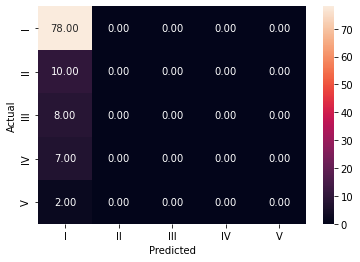

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        78
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.74       105
   macro avg       0.15      0.20      0.17       105
weighted avg       0.55      0.74      0.63       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187
3,Logistic Regression: SMOTE +TF-IDF,0.8415584,0.4761905,0.6812136,0.4761905,0.5477432,1.5005839
4,Logistic Regression: No Sampling + GLOVE,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8774270
5,Logistic Regression: Upsampling + GLOVE,0.6129870,0.3809524,0.7433189,0.3809524,0.4466417,1.4455932
6,Logistic Regression: SMOTE + GLOVE,0.7186147,0.3714286,0.7469828,0.3714286,0.4466682,1.4417811
7,Logistic Regression: No Sampling + CBOW,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8961484


In [126]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)                           
lr_cbow = train_test_model(lr, 'Logistic Regression: No Sampling + CBOW', X_train_cbow, X_test_cbow, y_train_cbow, y_test_cbow, 'none', 7, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_cbow])
resultsDf

#### 8. Logistic Regression with Oversampled data & CBOW

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


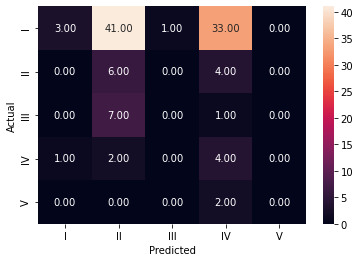

              precision    recall  f1-score   support

           0       0.75      0.04      0.07        78
           1       0.11      0.60      0.18        10
           2       0.00      0.00      0.00         8
           3       0.09      0.57      0.16         7
           4       0.00      0.00      0.00         2

    accuracy                           0.12       105
   macro avg       0.19      0.24      0.08       105
weighted avg       0.57      0.12      0.08       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187
3,Logistic Regression: SMOTE +TF-IDF,0.8415584,0.4761905,0.6812136,0.4761905,0.5477432,1.5005839
4,Logistic Regression: No Sampling + GLOVE,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8774270
5,Logistic Regression: Upsampling + GLOVE,0.6129870,0.3809524,0.7433189,0.3809524,0.4466417,1.4455932
6,Logistic Regression: SMOTE + GLOVE,0.7186147,0.3714286,0.7469828,0.3714286,0.4466682,1.4417811
7,Logistic Regression: No Sampling + CBOW,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8961484
8,Logistic Regression: Upsampling + CBOW,0.2805195,0.1238095,0.5734075,0.1238095,0.0821289,1.6034065


In [127]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)                                           
lr_df = train_test_model(lr, 'Logistic Regression: Upsampling + CBOW', X_train_cbow_up, X_test_cbow, y_train_cbow_up, y_test_cbow, 'none', 8, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

#### 9. Logistic Regression with SMOTE and CBOW

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


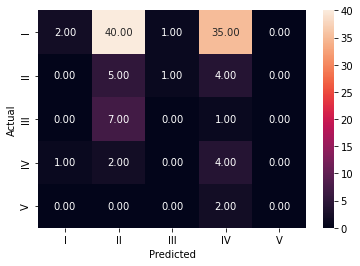

              precision    recall  f1-score   support

           0       0.67      0.03      0.05        78
           1       0.09      0.50      0.16        10
           2       0.00      0.00      0.00         8
           3       0.09      0.57      0.15         7
           4       0.00      0.00      0.00         2

    accuracy                           0.10       105
   macro avg       0.17      0.22      0.07       105
weighted avg       0.51      0.10      0.06       105



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression: No Sampling + TF-IDF,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,Logistic Regression: Upsampling + TF-IDF,0.8259740,0.4761905,0.6550265,0.4761905,0.5389988,1.4045187
3,Logistic Regression: SMOTE +TF-IDF,0.8415584,0.4761905,0.6812136,0.4761905,0.5477432,1.5005839
4,Logistic Regression: No Sampling + GLOVE,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8774270
5,Logistic Regression: Upsampling + GLOVE,0.6129870,0.3809524,0.7433189,0.3809524,0.4466417,1.4455932
6,Logistic Regression: SMOTE + GLOVE,0.7186147,0.3714286,0.7469828,0.3714286,0.4466682,1.4417811
7,Logistic Regression: No Sampling + CBOW,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8961484
8,Logistic Regression: Upsampling + CBOW,0.2805195,0.1238095,0.5734075,0.1238095,0.0821289,1.6034065
9,Logistic Regression: SMOTE + CBOW,0.3151515,0.1047619,0.5098535,0.1047619,0.0616281,1.6027462


In [128]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
lr_smote_df = train_test_model(lr, 'Logistic Regression: SMOTE + CBOW', X_train_cbow_smote, X_test_cbow, y_train_cbow_smote, y_test_cbow, 'none', 9, 'no', 'yes', 'no')
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

##### Let us try to visualize the findings above

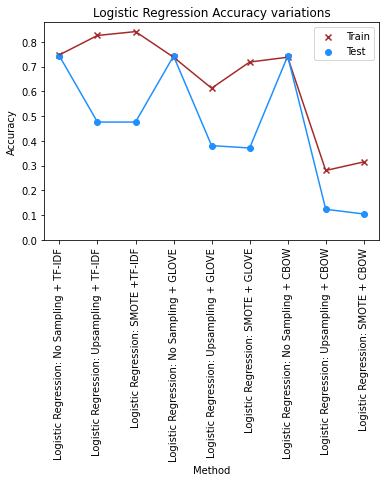

In [129]:
p1= plt.scatter(y=resultsDf['Train Accuracy'], x=resultsDf['Method'],c='brown', marker='x', label='1')
plt.plot(resultsDf['Method'], resultsDf['Train Accuracy'],c='brown')

p2= plt.scatter(y=resultsDf['Test Accuracy'], x=resultsDf['Method'],c='dodgerblue', marker='o', label='1')
plt.plot(resultsDf['Method'], resultsDf['Test Accuracy'],c='dodgerblue')

plt.legend((p1,p2),('Train','Test'),loc='upper right')
plt.title("Logistic Regression Accuracy variations")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.show()

- The up Sampled data seems to be underfitting
- The performance of Logistic Regression with unsampled data is average.

<a id="allML-comparison"></a>
### Compare ML Models

#### Function to Train and test ML models

In [130]:


def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=100, random_state=1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=10, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', 
                                                     min_samples_split=2, bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=50, learning_rate=0.2, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, 
                                                                 learning_rate=0.1, validation_fraction=0.2, random_state=1)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 5, learning_rate = 0.2, 
                                       gamma = 0.4, colsample_bytree = 0.5)]
       ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

In [131]:
def showplot(resultsDf,title):
    plt.figure(figsize=(10, 6))
    p1= plt.scatter(y=resultsDf['Train Accuracy'], x=resultsDf['Method'],c='cyan', marker='x', label='1')
    plt.plot(resultsDf['Method'], resultsDf['Train Accuracy'],c='cyan')

    p2= plt.scatter(y=resultsDf['Test Accuracy'], x=resultsDf['Method'],c='coral', marker='o', label='1')
    plt.plot(resultsDf['Method'], resultsDf['Test Accuracy'],c='coral')

    
    plt.legend((p1,p2),('Train','Test'),loc='upper right')
    plt.title(title)
    plt.xlabel("Method")
    plt.ylabel("Accuracy")
    plt.ylim(ymin=0)
    plt.xticks(rotation=90)
    plt.show()


#### All Models - Unsampled Data

- Since our model performs poorly on sampled data we will look at the model comparisons using unsampled set.

#### 1. TF-IDF data

In [132]:
resultsDf_tfidf = train_test_allmodels(X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, 'no')
resultsDf_tfidf

[07:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.7476038,0.7428571,0.5518367,0.7428571,0.6332553,0.8840046
2,RandomForestClassifier,0.9840256,0.7333333,0.5553398,0.7333333,0.6320442,1.5251410
3,KNeighborsClassifier,0.7699681,0.7238095,0.5865801,0.7238095,0.6431454,7.2141795
4,SVC,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.9164100
5,DecisionTreeClassifier,0.9840256,0.6285714,0.5993333,0.6285714,0.6135147,12.8467562
6,RidgeClassifier,0.7635783,0.7333333,0.5500000,0.7333333,0.6285714,1.0000000
7,BaggingClassifier,0.9552716,0.6857143,0.5457726,0.6857143,0.6077922,5.0818367
8,ExtraTreesClassifier,0.9840256,0.7333333,0.5553398,0.7333333,0.6320442,1.5650612
9,AdaBoostClassifier,0.7539936,0.7428571,0.5518367,0.7428571,0.6332553,1.3433355
10,GradientBoostingClassifier,0.9424920,0.7142857,0.5627706,0.7142857,0.6295400,0.9741408


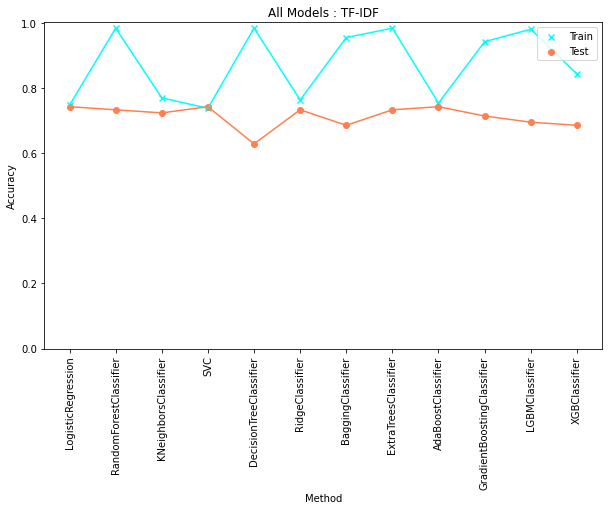

In [133]:
showplot(resultsDf_tfidf,"All Models : TF-IDF")

#### 2. GLOVE Embedded data

In [134]:
resultsDf_glove = train_test_allmodels(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'no')
resultsDf_glove

[07:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8774270
2,RandomForestClassifier,0.9968051,0.7428571,0.5571429,0.7428571,0.6367347,0.8878179
3,KNeighborsClassifier,0.8051118,0.7333333,0.6656315,0.7333333,0.6887768,7.2471865
4,SVC,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8559053
5,DecisionTreeClassifier,0.9968051,0.5333333,0.5851701,0.5333333,0.5570260,16.1180957
6,RidgeClassifier,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,1.0000000
7,BaggingClassifier,0.9776358,0.7428571,0.6369748,0.7428571,0.6524868,4.7425926
8,ExtraTreesClassifier,0.9968051,0.7428571,0.5571429,0.7428571,0.6367347,1.4537369
9,AdaBoostClassifier,0.7284345,0.7333333,0.5553398,0.7333333,0.6320442,1.2609339
10,GradientBoostingClassifier,0.9968051,0.7142857,0.5847425,0.7142857,0.6382808,1.0413375


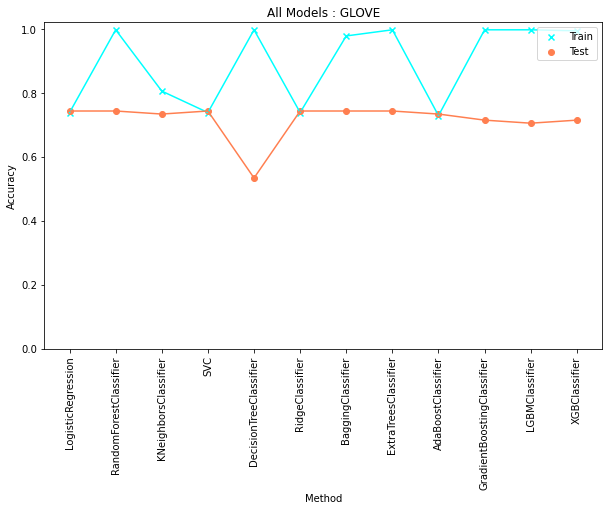

In [135]:
showplot(resultsDf_glove,"All Models : GLOVE")

#### 3. CBOW data

In [136]:
resultsDf_cbow = train_test_allmodels(X_train_cbow, X_test_cbow, y_train_cbow, y_test_cbow, 'no')
resultsDf_cbow

[07:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8961484
2,RandomForestClassifier,0.9968051,0.7428571,0.5571429,0.7428571,0.6367347,2.1259880
3,KNeighborsClassifier,0.7795527,0.7142857,0.5870130,0.7142857,0.6357981,7.2610147
4,SVC,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,0.8922665
5,DecisionTreeClassifier,0.9968051,0.5428571,0.5568027,0.5428571,0.5488340,15.7891549
6,RidgeClassifier,0.7380192,0.7428571,0.5518367,0.7428571,0.6332553,1.0000000
7,BaggingClassifier,0.9680511,0.7142857,0.5462185,0.7142857,0.6190476,5.0944556
8,ExtraTreesClassifier,0.9968051,0.7428571,0.5571429,0.7428571,0.6367347,1.7841603
9,AdaBoostClassifier,0.7412141,0.7428571,0.5518367,0.7428571,0.6332553,1.2120568
10,GradientBoostingClassifier,0.9968051,0.7142857,0.5886003,0.7142857,0.6359609,1.0470493


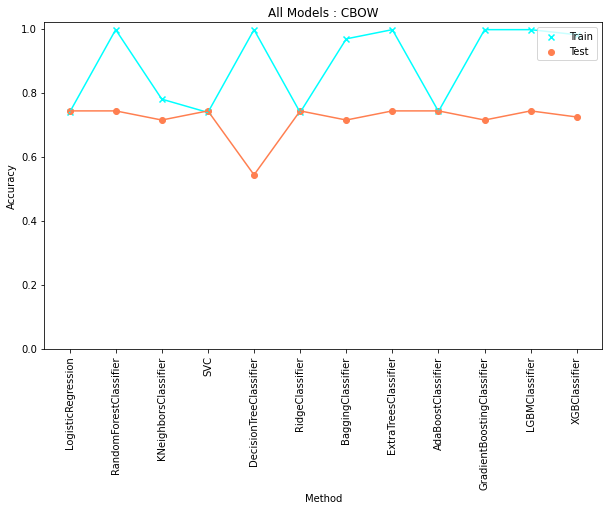

In [137]:
showplot(resultsDf_cbow,"All Models : CBOW")

##### Let us compare the test results from all the three vectorization techniques.

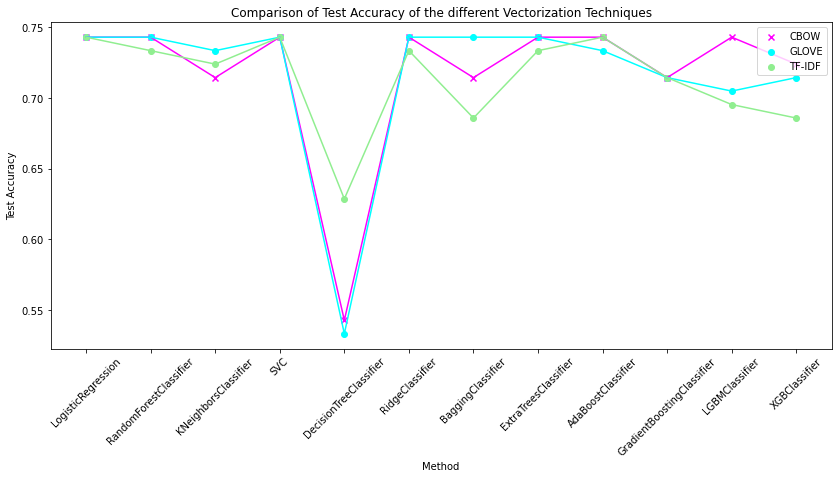

In [138]:
plt.figure(figsize=(14, 6))
p1= plt.scatter(y=resultsDf_cbow['Test Accuracy'], x=resultsDf_cbow['Method'],c='magenta', marker='x', label='1')
plt.plot(resultsDf_cbow['Method'], resultsDf_cbow['Test Accuracy'],c='magenta')

p2= plt.scatter(y=resultsDf_glove['Test Accuracy'], x=resultsDf_glove['Method'],c='cyan', marker='o', label='1')
plt.plot(resultsDf_glove['Method'], resultsDf_glove['Test Accuracy'],c='cyan')

p3= plt.scatter(y=resultsDf_tfidf['Test Accuracy'], x=resultsDf_tfidf['Method'],c='lightgreen', marker='o', label='1')
plt.plot(resultsDf_tfidf['Method'], resultsDf_tfidf['Test Accuracy'],c='lightgreen')

plt.legend((p1,p2,p3),('CBOW','GLOVE','TF-IDF'),loc='upper right')
plt.title("Comparison of Test Accuracy of the different Vectorization Techniques")
plt.xlabel("Method")
plt.ylabel("Test Accuracy")

plt.xticks(rotation=45)
plt.show()

- DT Classifier is performing extremely poorly.
- The performance of rest of the Classifiers are more or less the same. Tey all are average.
- TF-IDF doesn't seem to be giving as good results as the other two.
- GLOVE Embeddings is the most effective in most models.

<a id="ml-stacking"></a>
### ENSEMBLE TECHNIQUES : STACKING

In [139]:
# Function to get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression(max_iter=10000)))
    level0.append(('rf', RandomForestClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('dt', DecisionTreeClassifier()))
    level0.append(('et', ExtraTreesClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('ridge', RidgeClassifier()))
    level0.append(('ada', AdaBoostClassifier()))
    # define meta learner model
    level1 = SVC(probability=True)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [140]:
# Function to get a list of models to evaluate
def get_models():
    models = dict()
    models['LogisticRegression'] = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
    models['RandomForestClassifier'] = RandomForestClassifier(n_estimators=100, random_state=1)
    models['KNeighborsClassifier'] = KNeighborsClassifier(n_neighbors = 3)
    models['SVC'] = SVC(probability=True)
    models['DecisionTreeClassifier'] = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    models['RidgeClassifier'] = RidgeClassifier(random_state = 1)
    models['BaggingClassifier'] = BaggingClassifier(n_estimators=10, random_state=1, oob_score=True)
    models['ExtraTreesClassifier'] = ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', 
                                                         min_samples_split=2, bootstrap=True, oob_score=True)
    models['AdaBoostClassifier'] = AdaBoostClassifier(n_estimators=50, learning_rate=0.2, random_state=1)
    models['GradientBoostingClassifier'] = GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, 
                                                                      validation_fraction=0.2, random_state=1)
    models['LGBMClassifier'] = LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")
    models['XGBClassifier'] = XGBClassifier(min_child_weight = 7, max_depth = 5, learning_rate = 0.2, 
                                           gamma = 0.4, colsample_bytree = 0.5)
    models['Stacking'] = get_stacking()
        
    return models

In [141]:
# function to evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

#### 1. TF-IDF data 

In [142]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_tfidf, y_tfidf)
    results.append(scores)
    names.append(name)
    print('>Model :%s | Mean Score: %.3f | Best Score : %.3f St Dev : (%.3f)' 
          % (name, statistics.mean(scores), max(scores),statistics.stdev(scores)))
    

>Model :LogisticRegression | Mean Score: 0.729 | Best Score : 0.747 St Dev : (0.020)
>Model :RandomForestClassifier | Mean Score: 0.726 | Best Score : 0.747 St Dev : (0.015)
>Model :KNeighborsClassifier | Mean Score: 0.697 | Best Score : 0.726 St Dev : (0.025)
>Model :SVC | Mean Score: 0.738 | Best Score : 0.747 St Dev : (0.006)
>Model :DecisionTreeClassifier | Mean Score: 0.616 | Best Score : 0.702 St Dev : (0.045)
>Model :RidgeClassifier | Mean Score: 0.719 | Best Score : 0.747 St Dev : (0.024)
>Model :BaggingClassifier | Mean Score: 0.697 | Best Score : 0.726 St Dev : (0.023)
>Model :ExtraTreesClassifier | Mean Score: 0.726 | Best Score : 0.747 St Dev : (0.016)
>Model :AdaBoostClassifier | Mean Score: 0.738 | Best Score : 0.771 St Dev : (0.010)
>Model :GradientBoostingClassifier | Mean Score: 0.695 | Best Score : 0.750 St Dev : (0.028)
>Model :LGBMClassifier | Mean Score: 0.677 | Best Score : 0.738 St Dev : (0.029)
>Model :XGBClassifier | Mean Score: 0.704 | Best Score : 0.750 St De

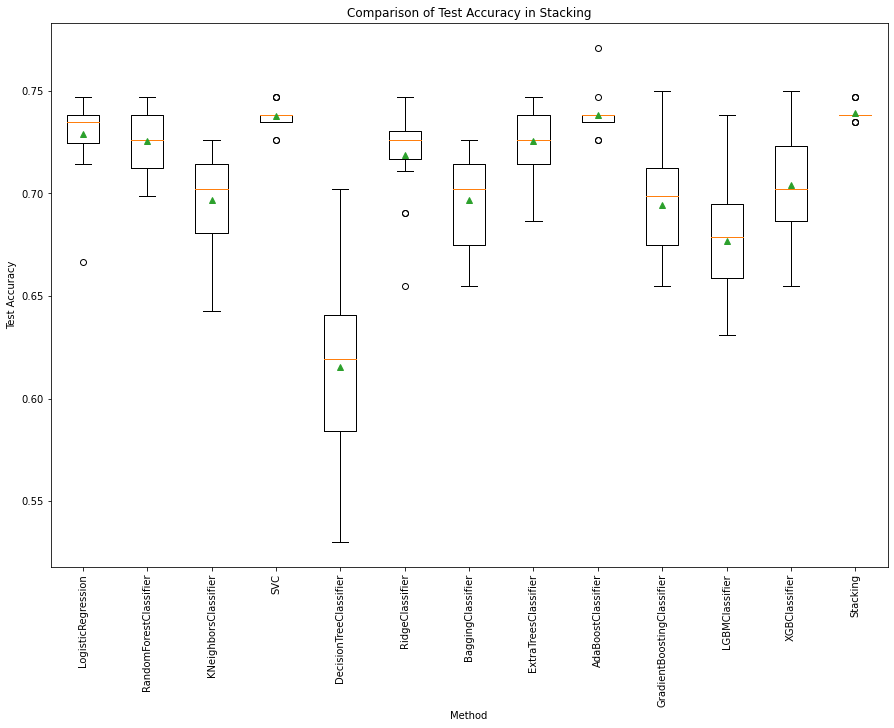

In [143]:
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names, showmeans=True)

plt.title("Comparison of Test Accuracy in Stacking")
plt.xlabel("Method")
plt.ylabel("Test Accuracy")

plt.xticks(rotation=90)
plt.show()

#### 2. GLOVE data 

In [144]:

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_glove, y_glove)
    results.append(scores)
    names.append(name)
    print('>Model :%s | Mean Score: %.3f | Best Score : %.3f St Dev : (%.3f)' 
          % (name, statistics.mean(scores), max(scores),statistics.stdev(scores)))
    

>Model :LogisticRegression | Mean Score: 0.739 | Best Score : 0.747 St Dev : (0.004)
>Model :RandomForestClassifier | Mean Score: 0.738 | Best Score : 0.750 St Dev : (0.007)
>Model :KNeighborsClassifier | Mean Score: 0.695 | Best Score : 0.750 St Dev : (0.027)
>Model :SVC | Mean Score: 0.739 | Best Score : 0.747 St Dev : (0.004)
>Model :DecisionTreeClassifier | Mean Score: 0.576 | Best Score : 0.643 St Dev : (0.048)
>Model :RidgeClassifier | Mean Score: 0.739 | Best Score : 0.747 St Dev : (0.004)
>Model :BaggingClassifier | Mean Score: 0.718 | Best Score : 0.750 St Dev : (0.018)
>Model :ExtraTreesClassifier | Mean Score: 0.737 | Best Score : 0.747 St Dev : (0.007)
>Model :AdaBoostClassifier | Mean Score: 0.728 | Best Score : 0.747 St Dev : (0.020)
>Model :GradientBoostingClassifier | Mean Score: 0.707 | Best Score : 0.750 St Dev : (0.016)
>Model :LGBMClassifier | Mean Score: 0.723 | Best Score : 0.747 St Dev : (0.015)
>Model :XGBClassifier | Mean Score: 0.728 | Best Score : 0.750 St De

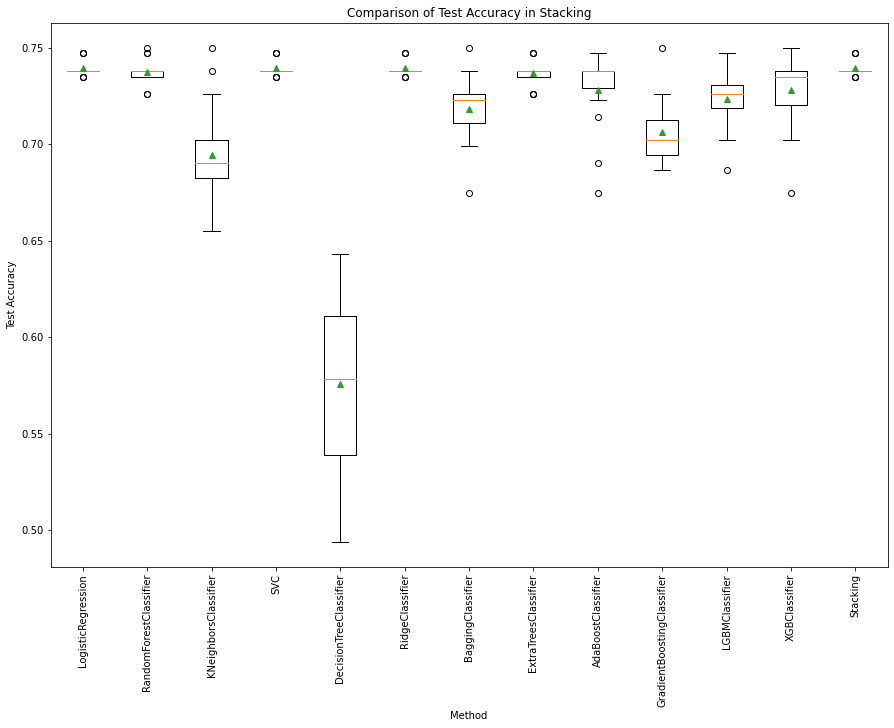

In [145]:
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names, showmeans=True)

plt.title("Comparison of Test Accuracy in Stacking")
plt.xlabel("Method")
plt.ylabel("Test Accuracy")

plt.xticks(rotation=90)
plt.show()

#### 3. CBOW data 

In [146]:

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_cbow, y_cbow)
    results.append(scores)
    names.append(name)
    print('>Model :%s | Mean Score: %.3f | Best Score : %.3f St Dev : (%.3f)' 
          % (name, statistics.mean(scores), max(scores),statistics.stdev(scores)))
    

>Model :LogisticRegression | Mean Score: 0.739 | Best Score : 0.747 St Dev : (0.004)
>Model :RandomForestClassifier | Mean Score: 0.734 | Best Score : 0.747 St Dev : (0.006)
>Model :KNeighborsClassifier | Mean Score: 0.691 | Best Score : 0.738 St Dev : (0.027)
>Model :SVC | Mean Score: 0.739 | Best Score : 0.747 St Dev : (0.004)
>Model :DecisionTreeClassifier | Mean Score: 0.554 | Best Score : 0.631 St Dev : (0.040)
>Model :RidgeClassifier | Mean Score: 0.739 | Best Score : 0.747 St Dev : (0.004)
>Model :BaggingClassifier | Mean Score: 0.710 | Best Score : 0.747 St Dev : (0.036)
>Model :ExtraTreesClassifier | Mean Score: 0.737 | Best Score : 0.747 St Dev : (0.007)
>Model :AdaBoostClassifier | Mean Score: 0.730 | Best Score : 0.750 St Dev : (0.017)
>Model :GradientBoostingClassifier | Mean Score: 0.700 | Best Score : 0.735 St Dev : (0.015)
>Model :LGBMClassifier | Mean Score: 0.722 | Best Score : 0.759 St Dev : (0.024)
>Model :XGBClassifier | Mean Score: 0.731 | Best Score : 0.771 St De

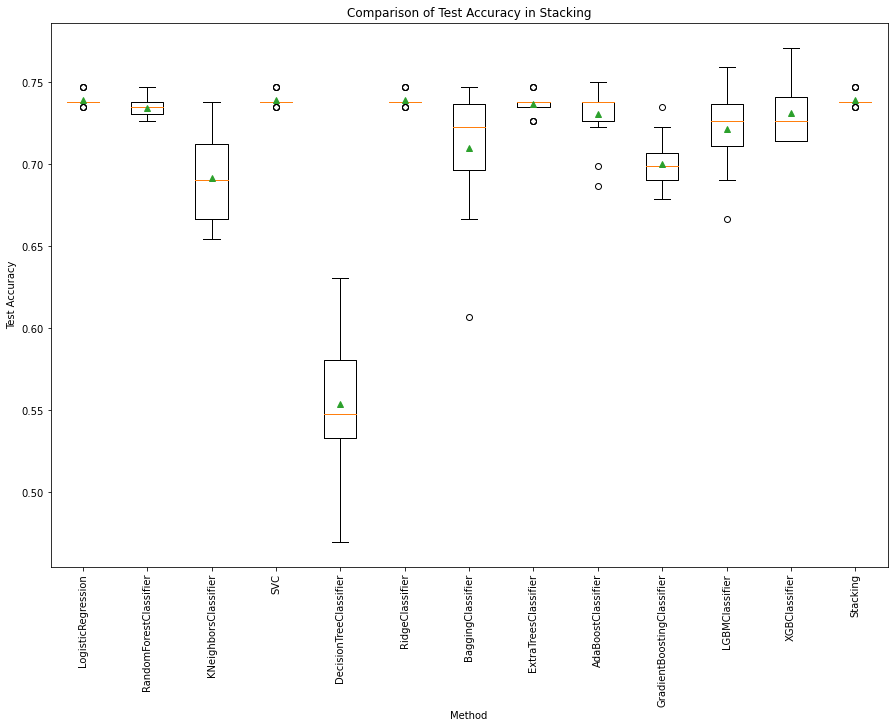

In [147]:
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names, showmeans=True)

plt.title("Comparison of Test Accuracy in Stacking")
plt.xlabel("Method")
plt.ylabel("Test Accuracy")

plt.xticks(rotation=90)
plt.show()

- Stacking doesn't necessarily give exceptional results. The stacking results are only as good as some of the better models.

<a id="ml-summary"></a>
### SUMMARY : ML Classifiers

- We were able to predict the accident level with a test accuracy of ~74% using a number of ML models.
- Some ML models performed very poorly such as Decision Tree Classifier.
- We used 3 different vectorization techniques. **GLOVE Embeddings, CBOW and TF-IDF**
- The performance of GLOVE Embeddings was slightly better than the other two and that of TF-IDF was slightly worse.
- There was some imbalance in the dataset.
- Class imbalance issue was handled using **Oversampling minority class using Resample Method and SMOTE**
- We found out that, for this particular dataset, the models perform better with original data as compared to sampled data.
- Sampled data tends to underfit the models.
- There was no clear BEST ML model, but Logistic Regression, Ridge, SVM, AdaBoost and ExtraTree performed better than the thers.

<a id="inferences"></a>
## 10. INFERENCES (so far)

* Size of the dataset is quiet small to analyse the cause of accidents correctly.
* The number of features available in dataset are not adequate.
* The data is however clean. 
* There were just 7 duplicates, but no missing data. Data cleaning did not take much effort. 
* So while the quality of data was good, the quantity is lacking.

**Observations with respect to model**

* Clearly ML models are not the best predictors in this scenario.
* Since we are predicting the accident level, we need to be able to predict the level as closely as possible. ML models fail to deliver on that front.

**What comes next?** 
* We need to explore the deep Learning algorithms and find out the best classfier for our problem.
* We might also want to explore some more vectorization techniques such as Bag of Words or Skip Gram
* We might also want to Test Data Augmentation on the upsampled data and see if that helps improve our sampling results.


In [148]:
# disable keras warnings
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

<a id="annclassifier"></a>
# Get ANN Multiclass Classification Metrics

In [149]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1


In [150]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

<a id="ann-models-clas-to-num-problem"></a>
#### Convert Classification to Numeric problem

In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and label encoded target variable. We can use simple densely connected neural networks to make predictions.

Since we have ordinal relationship between each category in target variable, I have considered this one as numerical/regression problem and try to observe the ANN behaviour.


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size = 0.25, random_state = 1, stratify = y_tfidf)
dummy_y = np_utils.to_categorical(y_tfidf)
dummy_y
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_tfidf, dummy_y, test_size = 0.20, random_state = 1, stratify = y_tfidf)

In [152]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/100
40/40 [==============================] - 1s 12ms/step - loss: 1.1383 - accuracy: 0.4888 - val_loss: 1.0252 - val_accuracy: 0.2667 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0568 - accuracy: 0.3482 - val_loss: 1.0225 - val_accuracy: 0.6476 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 1.0292 - accuracy: 0.4153 - val_loss: 0.9862 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0052 - accuracy: 0.4569 - val_loss: 0.9771 - val_accuracy: 0.3429 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9653 - accuracy: 0.5144 - val_loss: 0.9633 - val_accuracy: 0.5143 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9473 - accuracy: 0.3610 - val_loss: 0.9501 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.

Epoch 53/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0076 - accuracy: 0.7316 - val_loss: 1.3762 - val_accuracy: 0.7524 - lr: 1.0000e-35
Epoch 54/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0076 - accuracy: 0.7316 - val_loss: 1.3762 - val_accuracy: 0.7524 - lr: 1.0000e-35
Epoch 55/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0076 - accuracy: 0.7316 - val_loss: 1.3762 - val_accuracy: 0.7524 - lr: 1.0000e-39
Epoch 56/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0076 - accuracy: 0.7316 - val_loss: 1.3762 - val_accuracy: 0.7524 - lr: 1.0000e-39
Epoch 57/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0076 - accuracy: 0.7316 - val_loss: 1.3762 - val_accuracy: 0.7524 - lr: 1.0000e-39
Epoch 58/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0076 - accuracy: 0.7316 - val_loss: 1.3762 - val_accuracy: 0.7524 - lr: 1.0000e-39
Epoch 59/100
40/40 [==========================

In [153]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4550      
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dense_3 (Dense)             (None, 40)                6040      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


In [154]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
print('Test accuracy: %.2f' % (accuracy*100))

Test accuracy: 75.24


Text(0.5, 1.0, 'Training and validation loss')

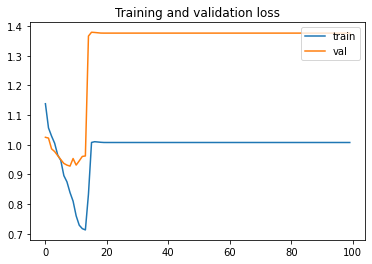

In [155]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history.history['loss'], label = 'train')
plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is underfit model, it can be identified from the learning curve of the training loss only. It is showing noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all and model does not have a suitable capacity for the complexity of the dataset.

<a id="ann-models-multi-class"></a>
#### Multiclass classification - Target variable - One hot encoded

In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [156]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)



target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_dummy, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train_dummy, y_train_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test_dummy, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 2s 23ms/step - loss: 1.8883 - categorical_accuracy: 0.1796 - val_loss: 1.3925 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 11ms/step - loss: 1.6433 - categorical_accuracy: 0.3802 - val_loss: 1.2055 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 11ms/step - loss: 1.3878 - categorical_accuracy: 0.4701 - val_loss: 1.0890 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 11ms/step - loss: 1.2144 - categorical_accuracy: 0.5689 - val_loss: 0.9969 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 11ms/step - loss: 1.1723 - categorical_accuracy: 0.6108 - val_loss: 0.9666 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 11ms/step - loss: 1.1053 - categorical_accuracy: 

Epoch 46/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9686 - categorical_accuracy: 0.7365 - val_loss: 0.9157 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 47/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9421 - categorical_accuracy: 0.7395 - val_loss: 0.9142 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 48/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9759 - categorical_accuracy: 0.7425 - val_loss: 0.9134 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 49/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9496 - categorical_accuracy: 0.7365 - val_loss: 0.9135 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 50/100
42/42 [==============================] - 0s 10ms/step - loss: 0.9207 - categorical_accuracy: 0.7365 - val_loss: 0.9128 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 51/100
42/42 [==============================] - 0s 10ms/step - loss: 0.977

42/42 [==============================] - 0s 10ms/step - loss: 0.9437 - categorical_accuracy: 0.7395 - val_loss: 0.9128 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 91/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9637 - categorical_accuracy: 0.7365 - val_loss: 0.9148 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 92/100
42/42 [==============================] - 0s 10ms/step - loss: 0.9722 - categorical_accuracy: 0.7395 - val_loss: 0.9148 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 93/100
42/42 [==============================] - 0s 10ms/step - loss: 0.9591 - categorical_accuracy: 0.7395 - val_loss: 0.9158 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 94/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9521 - categorical_accuracy: 0.7365 - val_loss: 0.9147 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 95/100
42/42 [==============================] - 0s 11ms/step - loss: 0.9468 - categoric

In [157]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                910       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                      

In [158]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train_dummy, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test_dummy, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [159]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test_dummy, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

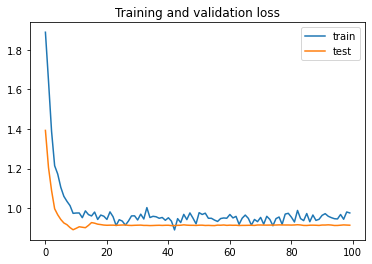

In [160]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

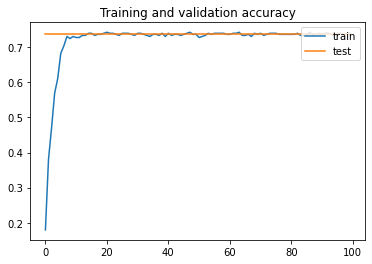

In [161]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

#### We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [162]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


#### Multiclass classification - Target variable - One hot encoded with SMOTE data

In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [163]:
#df_tfidf_smote = smoteSample(X_train_tfidf ,y_train_tfidf)
# Separate input features and target
#X_train_tfidf_smote = df_tfidf_smote.iloc[:,:-1]
#y_train_tfidf_smote = df_tfidf_smote.iloc[:,-1:]

# convert integers to dummy variables (i.e. one hot encoded)
y_train_tfidf_smote_dummy = np_utils.to_categorical(y_train_tfidf_smote)
y_train_tfidf_smote_dummy

X_train_smote_dummy, X_test_smote_dummy, y_train_smote_dummy, y_test_smote_dummy = train_test_split(X_train_tfidf_smote, y_train_tfidf_smote_dummy, test_size = 0.20, random_state = 1, stratify = y_train_tfidf_smote)

In [164]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train_smote_dummy.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_smote_dummy, y_train_smote_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train_smote_dummy, y_train_smote_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test_smote_dummy, y_test_smote_dummy), callbacks=[rlrp, metrics])

Epoch 1/100
116/116 [==============================] - 3s 13ms/step - loss: 1.8742 - categorical_accuracy: 0.2316 - val_loss: 1.5919 - val_categorical_accuracy: 0.1861 - lr: 0.0010
Epoch 2/100
116/116 [==============================] - 1s 8ms/step - loss: 1.6642 - categorical_accuracy: 0.2803 - val_loss: 1.5118 - val_categorical_accuracy: 0.2857 - lr: 0.0010
Epoch 3/100
116/116 [==============================] - 1s 9ms/step - loss: 1.5402 - categorical_accuracy: 0.3409 - val_loss: 1.3956 - val_categorical_accuracy: 0.4416 - lr: 0.0010
Epoch 4/100
116/116 [==============================] - 1s 8ms/step - loss: 1.4829 - categorical_accuracy: 0.3745 - val_loss: 1.2618 - val_categorical_accuracy: 0.4719 - lr: 0.0010
Epoch 5/100
116/116 [==============================] - 1s 9ms/step - loss: 1.4119 - categorical_accuracy: 0.4004 - val_loss: 1.2285 - val_categorical_accuracy: 0.4675 - lr: 0.0010
Epoch 6/100
116/116 [==============================] - 1s 8ms/step - loss: 1.3835 - categorical_acc

116/116 [==============================] - 1s 8ms/step - loss: 1.2809 - categorical_accuracy: 0.4751 - val_loss: 0.9738 - val_categorical_accuracy: 0.6926 - lr: 1.0000e-11
Epoch 47/100
116/116 [==============================] - 1s 8ms/step - loss: 1.3082 - categorical_accuracy: 0.4556 - val_loss: 0.9776 - val_categorical_accuracy: 0.6840 - lr: 1.0000e-15
Epoch 48/100
116/116 [==============================] - 1s 8ms/step - loss: 1.2868 - categorical_accuracy: 0.4654 - val_loss: 0.9797 - val_categorical_accuracy: 0.6926 - lr: 1.0000e-15
Epoch 49/100
116/116 [==============================] - 1s 8ms/step - loss: 1.2681 - categorical_accuracy: 0.4632 - val_loss: 0.9822 - val_categorical_accuracy: 0.6797 - lr: 1.0000e-15
Epoch 50/100
116/116 [==============================] - 1s 9ms/step - loss: 1.3318 - categorical_accuracy: 0.4351 - val_loss: 0.9800 - val_categorical_accuracy: 0.6840 - lr: 1.0000e-15
Epoch 51/100
116/116 [==============================] - 1s 9ms/step - loss: 1.2983 - cat

116/116 [==============================] - 1s 9ms/step - loss: 1.2988 - categorical_accuracy: 0.4762 - val_loss: 0.9784 - val_categorical_accuracy: 0.6926 - lr: 0.0000e+00
Epoch 91/100
116/116 [==============================] - 1s 9ms/step - loss: 1.3209 - categorical_accuracy: 0.4470 - val_loss: 0.9783 - val_categorical_accuracy: 0.6883 - lr: 0.0000e+00
Epoch 92/100
116/116 [==============================] - 1s 8ms/step - loss: 1.2959 - categorical_accuracy: 0.4805 - val_loss: 0.9840 - val_categorical_accuracy: 0.6926 - lr: 0.0000e+00
Epoch 93/100
116/116 [==============================] - 1s 9ms/step - loss: 1.2930 - categorical_accuracy: 0.4708 - val_loss: 0.9849 - val_categorical_accuracy: 0.6926 - lr: 0.0000e+00
Epoch 94/100
116/116 [==============================] - 1s 9ms/step - loss: 1.2893 - categorical_accuracy: 0.4762 - val_loss: 0.9845 - val_categorical_accuracy: 0.6926 - lr: 0.0000e+00
Epoch 95/100
116/116 [==============================] - 1s 8ms/step - loss: 1.3148 - cat

In [165]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                910       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                      

In [166]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train_smote_dummy, y_train_smote_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test_smote_dummy, y_test_smote_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 69.59
Test accuracy: 69.70


Text(0.5, 1.0, 'Training and validation loss')

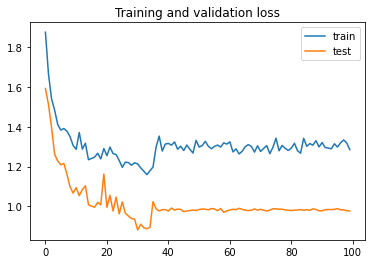

In [167]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

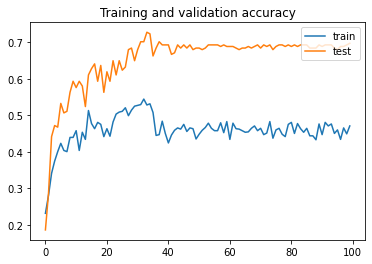

In [168]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

<a id="nlp-models"></a>
## 12. Design, train and test RNN or LSTM classifiers

#### Architecture

1. Create a model with Text inputs only.
2. Create a model with Categorical inputs only.
3. Create a model with Multiple inputs.

<a id="nlp-models-text-input"></a>
##### 1. Creating a Model with Text Inputs Only

In this section, we will create a classification model that uses accident description column alone.

In [169]:
# Select input and output features
X_text = idf['Processed_Critical_Text']
y_text = idf['Accident_Level']

In [170]:
# Encode labels in column 'Accident Level'.
lbl_text = LabelEncoder();
y_text = lbl_text.fit_transform(y_text)

In [171]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (334)
y_text_train shape : (334,)
X_text_test shape : (84)
y_text_test shape : (84,)


In [172]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

In [173]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [174]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2474


In [175]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [176]:
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)
#param = 1e-9
param = 1e-4

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model_text = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model_text.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [177]:
print(model_text.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 200)          494800    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896 

In [178]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


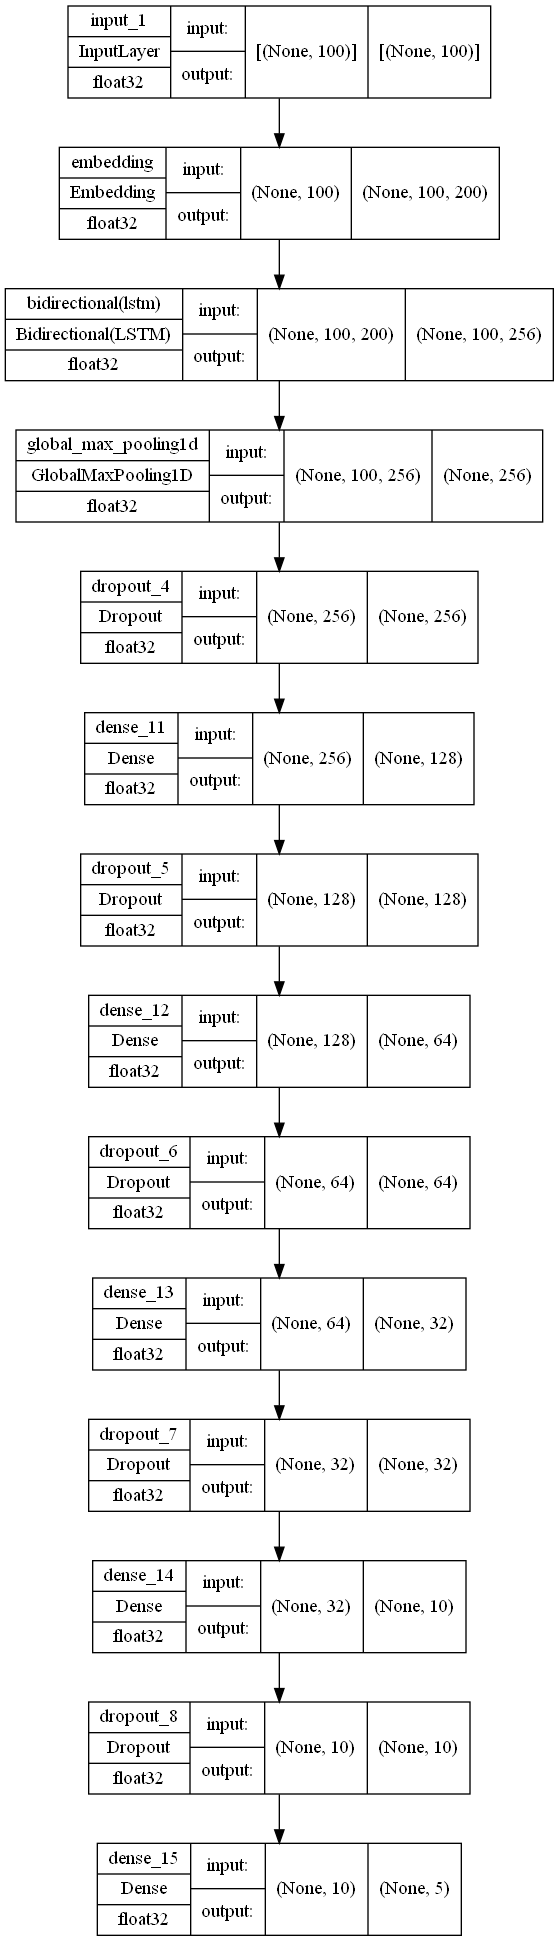

In [179]:
plot_model(model_text, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [180]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multilabel'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = model_text.fit(X_text_train, y_text_train, epochs=20, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/20
42/42 [==============================] - 11s 142ms/step - loss: 1.5941 - acc: 0.3174 - val_loss: 1.3915 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/20
42/42 [==============================] - 4s 85ms/step - loss: 1.2683 - acc: 0.6796 - val_loss: 1.1259 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/20
42/42 [==============================] - 4s 88ms/step - loss: 1.2166 - acc: 0.7216 - val_loss: 1.0134 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/20
42/42 [==============================] - 4s 91ms/step - loss: 1.1486 - acc: 0.7186 - val_loss: 0.9898 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/20
42/42 [==============================] - 4s 86ms/step - loss: 1.0557 - acc: 0.7335 - val_loss: 0.9747 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/20
42/42 [==============================] - 4s 84ms/step - loss: 1.0747 - acc: 0.7335 - val_loss: 0.9818 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/20
42/42 [==============================] - 4s 86ms/step - loss: 1.0354 - acc: 0.7365 - val_loss: 0.9776 - val_acc: 0.7381 - l

In [181]:
# evaluate the keras model
_, train_accuracy = model_text.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = model_text.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [182]:
accuracy, precision, recall, f1 = get_classification_metrics(model_text, X_text_test, y_text_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

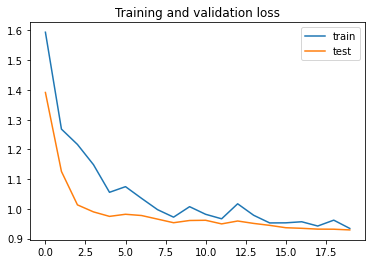

In [183]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

In [184]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


<a id="nlp-models-cat-features"></a>
##### 2. Creating a Model with Categorical features Only

In this section, we will create a classification model that uses categorical columns alone. Since the data for these columns is well structured and doesn't contain any sequential or spatial pattern, we can use simple densely connected neural networks to make predictions.

In [185]:
# Select input and output features
X_cat = glove_df.drop(['Accident_Level','Potential_Accident_Level'], axis = 1)
y_cat = glove_df['Accident_Level']

In [186]:
# Encode labels in column 'Accident Level'.
y_cat = LabelEncoder().fit_transform(y_cat)

In [187]:
# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

X_cat_train shape : (334)
y_cat_train shape : (334,)
X_cat_test shape : (84)
y_cat_test shape : (84,)


In [188]:
# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = np_utils.to_categorical(y_cat_train)
y_cat_test = np_utils.to_categorical(y_cat_test)

In [189]:
X_cat_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
202,-0.0036542,-0.0024162,-0.0626146,-0.0244807,-0.0145891,0.0302315,-0.1125288,-0.0733834,-0.0266780,-0.0354182,0.0351391,0.0212503,0.0430509,0.1080715,0.0547191,0.0187627,-0.0726298,-0.0230253,0.0504139,-0.0331364,0.0180319,0.5633017,0.0698174,-0.0091279,0.0073432,0.0088305,-0.0638284,-0.0375763,-0.0501060,-0.0897732,0.0025462,0.0221908,0.0452653,0.0426543,0.0321809,-0.0121335,-0.0345427,-0.0887454,0.0081403,0.0332052,0.0410068,-0.0273723,0.0153473,0.1020463,-0.0272576,0.0093949,0.0770512,0.0262150,0.0033199,0.1069419
258,0.0036847,0.0208838,-0.0774451,-0.0609689,-0.0462643,0.0038668,-0.0600095,-0.0147342,-0.0041005,0.0469676,-0.0132166,0.0294197,0.1106063,0.0555112,0.0881311,-0.0359002,-0.0130473,0.0005596,0.0011458,-0.0264385,0.0176176,0.6408780,0.0255557,-0.0408471,-0.0017363,-0.0090067,-0.0073673,0.0118370,-0.0839578,-0.0179561,0.0046672,-0.0549388,0.0050793,0.0120024,0.0370291,-0.0292122,-0.0909681,-0.0833323,-0.0433820,0.0082640,0.0138175,-0.0386760,-0.0257520,0.0539923,-0.0181216,-0.0019704,0.0403444,0.0023018,-0.0107033,0.0940480
6,-0.0137552,-0.0088619,-0.0589166,-0.0538524,-0.0492762,-0.0128553,-0.1079674,-0.0590634,-0.0171694,0.0486860,0.0027924,0.0275758,0.0073361,0.0325945,0.1098011,-0.0346143,-0.0522476,0.0312094,-0.0182114,-0.0546190,-0.0032537,0.6174193,0.0400220,0.0222403,-0.0125440,0.0052238,-0.0473938,0.0209092,-0.0719003,-0.0360284,0.0061474,0.0084419,0.0592693,0.0466908,0.0143235,0.0081819,-0.1140770,-0.0332312,-0.0508695,0.0168836,0.0410175,0.0020438,0.0122128,0.0984478,0.0382982,0.0319240,0.0598708,0.0232329,-0.0185071,0.1004144
84,-0.0433507,-0.0244942,-0.0951533,-0.0790093,0.0010624,0.0250423,-0.0811341,-0.0470611,-0.0161938,-0.0013312,0.0562718,0.0230541,0.0371020,0.0481470,0.0989011,0.0013357,-0.0538216,0.0031345,0.0454095,-0.0201575,0.0269501,0.6353765,0.0599380,-0.0640709,0.0541837,-0.0539245,0.0046902,-0.0352220,-0.0375128,-0.0180769,0.0450150,-0.0225628,-0.0046291,0.0522223,0.0517198,0.0013402,-0.0638286,-0.0527350,-0.0453521,0.0248319,0.0380389,0.0064929,-0.0238329,0.0679872,0.0065915,0.0500179,0.0599086,-0.0649184,-0.0342473,0.0552324
338,0.0076929,-0.0333552,-0.0680892,-0.0537381,0.0306181,-0.0114915,-0.0684530,-0.0550195,-0.0343757,-0.1131427,0.0191016,-0.0105814,0.0645743,0.0530187,0.1152198,-0.0127210,-0.0317395,0.0139382,0.0141977,0.0161291,0.0120033,0.6364605,0.0434456,-0.0296781,0.0624254,-0.0343390,-0.0072867,0.0239944,-0.0745503,-0.0313230,0.0472417,-0.0035272,-0.0078659,0.0430365,0.0326627,-0.0440871,-0.0730546,-0.0895541,-0.0494595,0.0105894,-0.0068076,-0.0280420,0.0125360,0.0727472,0.0213014,0.0650463,0.0496286,-0.0711612,0.0136957,0.0202044


In [190]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()#StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.fit_transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres

In [191]:
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

input2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_1 = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm())(input2)
drop_out_layer_1 = Dropout(0.2)(dense_layer_1)
batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)
dense_layer_2 = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)
dense_layer_3 = Dense(5, activation='softmax', kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

model = Model(inputs=input2, outputs=dense_layer_3)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [192]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_16 (Dense)            (None, 10)                510       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                           

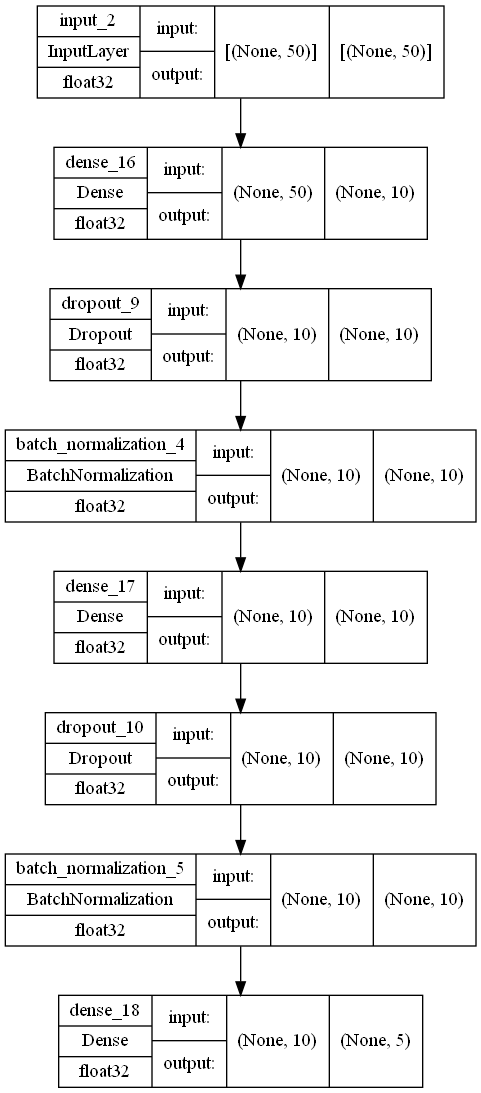

In [193]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [194]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_cat_train, y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 2s 18ms/step - loss: 1.8866 - acc: 0.2006 - val_loss: 1.3881 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 9ms/step - loss: 1.6163 - acc: 0.3503 - val_loss: 1.2064 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 9ms/step - loss: 1.3549 - acc: 0.4731 - val_loss: 1.1032 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 8ms/step - loss: 1.1768 - acc: 0.6108 - val_loss: 1.0284 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 1.1560 - acc: 0.6018 - val_loss: 0.9872 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 9ms/step - loss: 1.0812 - acc: 0.6856 - val_loss: 0.9579 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 7ms/step - loss: 1.0521 - acc: 0.6946 - val_loss: 0.9457 - val_acc: 0.7381 - lr

Epoch 57/100
42/42 [==============================] - 0s 8ms/step - loss: 0.9172 - acc: 0.7395 - val_loss: 0.9388 - val_acc: 0.7381 - lr: 1.0000e-31
Epoch 58/100
42/42 [==============================] - 0s 8ms/step - loss: 0.9394 - acc: 0.7365 - val_loss: 0.9378 - val_acc: 0.7381 - lr: 1.0000e-35
Epoch 59/100
42/42 [==============================] - 0s 8ms/step - loss: 0.8831 - acc: 0.7365 - val_loss: 0.9390 - val_acc: 0.7381 - lr: 1.0000e-35
Epoch 60/100
42/42 [==============================] - 0s 8ms/step - loss: 0.9294 - acc: 0.7425 - val_loss: 0.9370 - val_acc: 0.7381 - lr: 1.0000e-35
Epoch 61/100
42/42 [==============================] - 0s 9ms/step - loss: 0.9715 - acc: 0.7335 - val_loss: 0.9386 - val_acc: 0.7381 - lr: 1.0000e-35
Epoch 62/100
42/42 [==============================] - 0s 8ms/step - loss: 0.9285 - acc: 0.7395 - val_loss: 0.9359 - val_acc: 0.7381 - lr: 1.0000e-35
Epoch 63/100
42/42 [==============================] - 0s 9ms/step - loss: 0.9304 - acc: 0.7395 - val_loss:

In [195]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [196]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_cat_test, y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

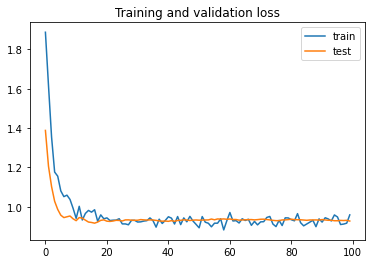

In [197]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

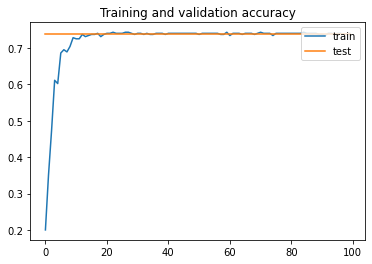

In [198]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

<a id="nlp-models-multiple-input"></a>
##### 3. Creating a Model with Multiple Inputs

The first submodel will accept textual input in the form of accident description. This submodel will consist of an input shape layer, an embedding layer, and bidirectional LSTM layer of 128 neurons followed by max pool layer, drop out and dense layers. The second submodel will accept input in the form of meta information which consists of dense, batch norm and drop out layers.

The output from the dropout layer of the first submodel and the output from the batch norm layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have five neuorns corresponding to each accident level.


In [199]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)
#param = 1e-9
param = 1e-4


input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [200]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 200)     494800      ['input_3[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 100, 256)    336896      ['embedding_1[0][0]']            
 )                                                                                                
                                                                                                  
 global_max_pooling1d_1 (Global  (None, 256)         0           ['bidirectional_1[0][0]']  

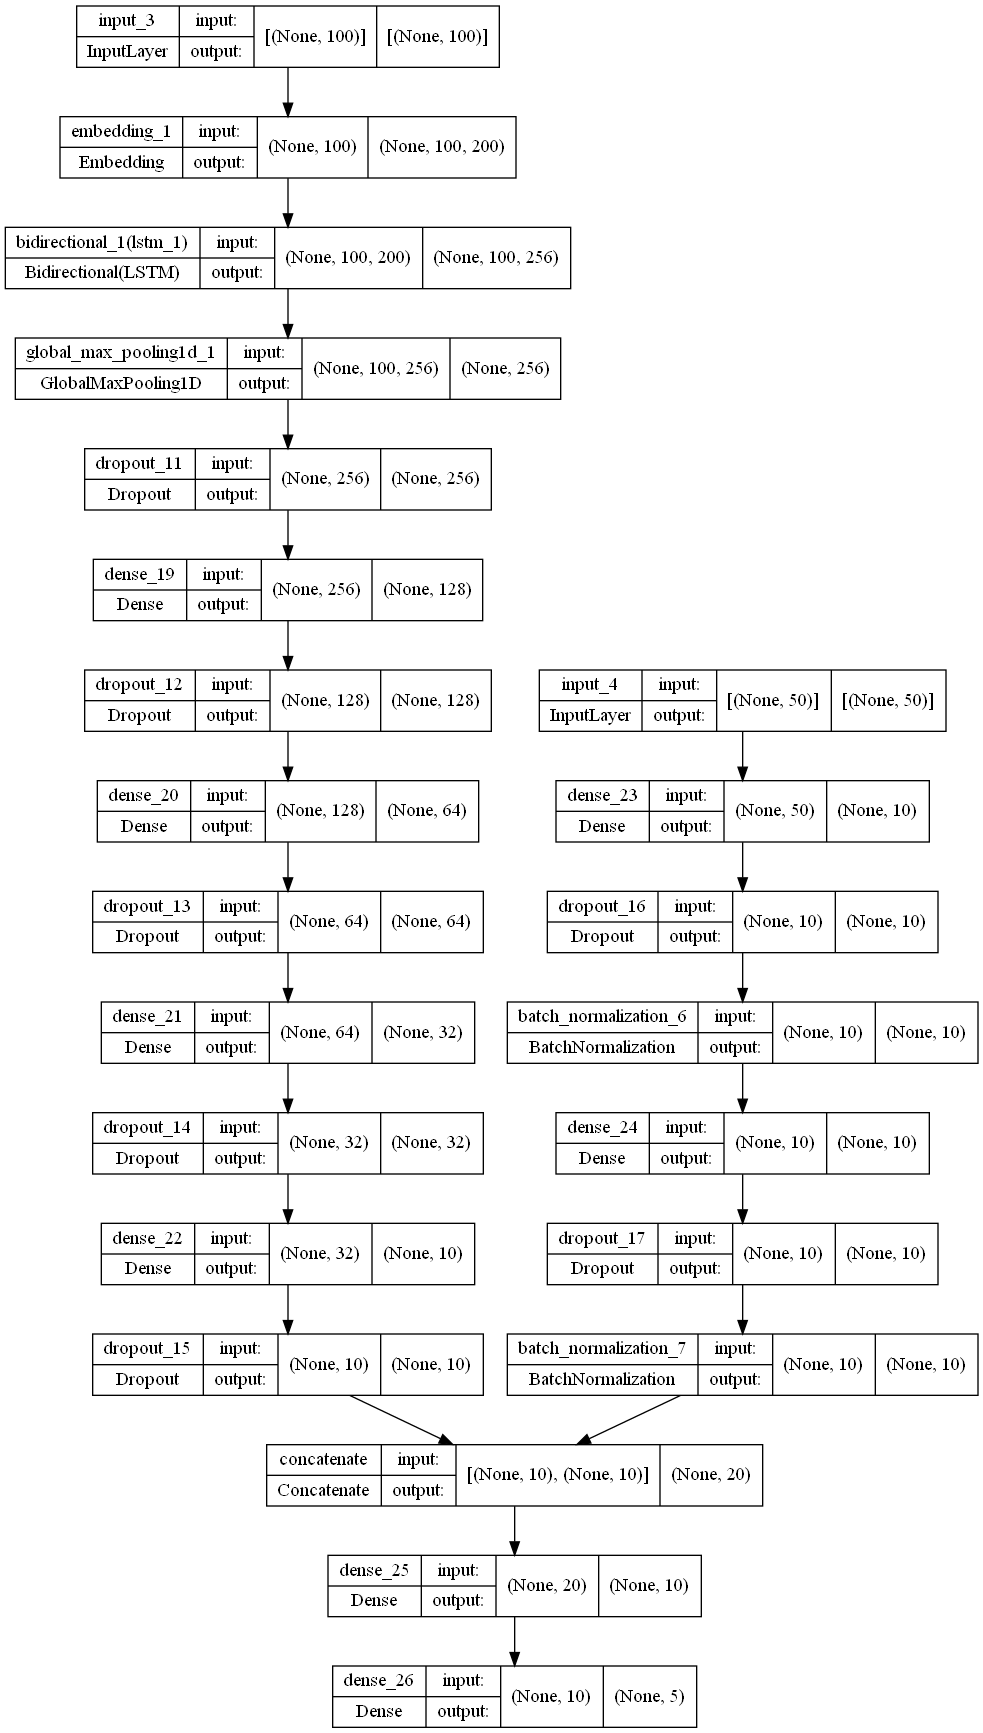

In [201]:
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [202]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 12s 150ms/step - loss: 1.6993 - acc: 0.1557 - val_loss: 1.4312 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 4s 90ms/step - loss: 1.3477 - acc: 0.5539 - val_loss: 1.2266 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 4s 90ms/step - loss: 1.1778 - acc: 0.6916 - val_loss: 1.0966 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 4s 90ms/step - loss: 1.0510 - acc: 0.7335 - val_loss: 1.0123 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 4s 87ms/step - loss: 1.0444 - acc: 0.7365 - val_loss: 0.9864 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 4s 86ms/step - loss: 1.0017 - acc: 0.7335 - val_loss: 0.9676 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 4s 89ms/step - loss: 1.0197 - acc: 0.7365 - val_loss: 0.9651 - val_acc: 0.7

42/42 [==============================] - 4s 97ms/step - loss: 0.9231 - acc: 0.7395 - val_loss: 0.8967 - val_acc: 0.7381 - lr: 1.0000e-27
Epoch 57/100
42/42 [==============================] - 4s 94ms/step - loss: 0.9084 - acc: 0.7395 - val_loss: 0.8988 - val_acc: 0.7381 - lr: 1.0000e-27
Epoch 58/100
42/42 [==============================] - 4s 100ms/step - loss: 0.9409 - acc: 0.7395 - val_loss: 0.8996 - val_acc: 0.7381 - lr: 1.0000e-27
Epoch 59/100
42/42 [==============================] - 4s 101ms/step - loss: 0.9012 - acc: 0.7395 - val_loss: 0.8984 - val_acc: 0.7381 - lr: 1.0000e-27
Epoch 60/100
42/42 [==============================] - 4s 101ms/step - loss: 0.9223 - acc: 0.7395 - val_loss: 0.8982 - val_acc: 0.7381 - lr: 1.0000e-27
Epoch 61/100
42/42 [==============================] - 4s 102ms/step - loss: 0.9190 - acc: 0.7395 - val_loss: 0.8982 - val_acc: 0.7381 - lr: 1.0000e-31
Epoch 62/100
42/42 [==============================] - 4s 100ms/step - loss: 0.9066 - acc: 0.7395 - val_loss: 

In [203]:
# evaluate the keras model
_, train_accuracy = model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [204]:
accuracy, precision, recall, f1 = get_classification_metrics(model, [X_text_test, X_cat_test], y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

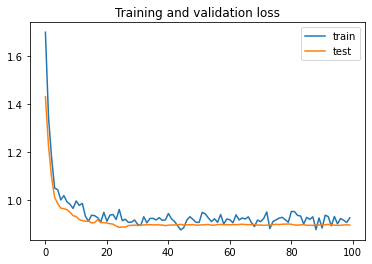

In [205]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

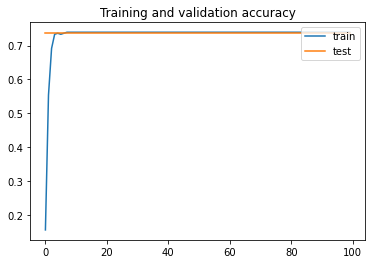

In [206]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

<a id="tkinter"></a>
## 13. Chat Interface using tkinter

In [207]:
from tkinter import *
from tkinter import messagebox

In [208]:
def predictAccidentLevel(input):
    # The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
    input = cleaning(input)
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(input)
    
    X = tokenizer.texts_to_sequences(input)

    vocab_size = len(tokenizer.word_index) + 1
    print("vocab_size:", vocab_size)
    maxlen = 100
    X = pad_sequences(X, padding='post', maxlen=maxlen)
    
    y_pred = model_text.predict(X)
    y_pred = np.argmax(y_pred, axis=-1)
    y_pred = lbl_text.inverse_transform(y_pred)
    return y_pred

In [209]:

saved_username = ["You"]
#ans=["PyBot"]
window_size="400x400"

In [ ]:
class ChatInterface(Frame):

    def __init__(self, master=None):
        Frame.__init__(self, master)
        self.master = master

        # sets default bg for top level windows
        self.tl_bg = "#EEEEEE"
        self.tl_bg2 = "#EEEEEE"
        self.tl_fg = "#000000"
        self.font = "Verdana 10"

        menu = Menu(self.master)
        self.master.config(menu=menu, bd=5)

              
    # Menu bar

    # File
        file = Menu(menu, tearoff=0)
        menu.add_cascade(label="File", menu=file)
       # file.add_command(label="Save Chat Log", command=self.save_chat)
        file.add_command(label="Clear Chat", command=self.clear_chat)
      #  file.add_separator()
        file.add_command(label="Exit",command=self.chatexit)

    # Options
        options = Menu(menu, tearoff=0)
        menu.add_cascade(label="Options", menu=options)

        # username
       

        

        # font
        font = Menu(options, tearoff=0)
        options.add_cascade(label="Font", menu=font)
        font.add_command(label="Default",command=self.font_change_default)
        font.add_command(label="Times",command=self.font_change_times)
        font.add_command(label="System",command=self.font_change_system)
        font.add_command(label="Helvetica",command=self.font_change_helvetica)
        font.add_command(label="Fixedsys",command=self.font_change_fixedsys)

        # color theme
        color_theme = Menu(options, tearoff=0)
        options.add_cascade(label="Color Theme", menu=color_theme)
        color_theme.add_command(label="Default",command=self.color_theme_default) 
       # color_theme.add_command(label="Night",command=self.) 
        color_theme.add_command(label="Grey",command=self.color_theme_grey) 
        color_theme.add_command(label="Blue",command=self.color_theme_dark_blue) 
       
        color_theme.add_command(label="Torque",command=self.color_theme_turquoise)
        color_theme.add_command(label="Hacker",command=self.color_theme_hacker)
       # color_theme.add_command(label='Mkbhd',command=self.MKBHD)


      
        help_option = Menu(menu, tearoff=0)
        menu.add_cascade(label="Help", menu=help_option)
        #help_option.add_command(label="Features", command=self.features_msg)
        help_option.add_command(label="About ChatBot", command=self.msg)
        help_option.add_command(label="Develpoers", command=self.about)

        self.text_frame = Frame(self.master, bd=6)
        self.text_frame.pack(expand=True, fill=BOTH)

        # scrollbar for text box
        self.text_box_scrollbar = Scrollbar(self.text_frame, bd=0)
        self.text_box_scrollbar.pack(fill=Y, side=RIGHT)

        # contains messages
        self.text_box = Text(self.text_frame, yscrollcommand=self.text_box_scrollbar.set, state=DISABLED,
                             bd=1, padx=6, pady=6, spacing3=8, wrap=WORD, bg=None, font="Verdana 10", relief=GROOVE,
                             width=10, height=1)
        self.text_box.pack(expand=True, fill=BOTH)
        self.text_box_scrollbar.config(command=self.text_box.yview)

        # frame containing user entry field
        self.entry_frame = Frame(self.master, bd=1)
        self.entry_frame.pack(side=LEFT, fill=BOTH, expand=True)

        # entry field
        self.entry_field = Entry(self.entry_frame, bd=1, justify=LEFT)
        self.entry_field.pack(fill=X, padx=6, pady=6, ipady=3)
        # self.users_message = self.entry_field.get()

        # frame containing send button and emoji button
        self.send_button_frame = Frame(self.master, bd=0)
        self.send_button_frame.pack(fill=BOTH)
        
        self.text_box.configure(state=NORMAL)
        self.text_box.insert(END, "Welcome to Chatbot! How can I help you\n")
        self.text_box.configure(state=DISABLED)
        self.text_box.see(END)

        # send button
        self.send_button = Button(self.send_button_frame, text="Send", width=5, relief=GROOVE, bg='white',
                                  bd=1, command=lambda: self.send_message_insert(None), activebackground="#FFFFFF",
                                  activeforeground="#000000")
        self.send_button.pack(side=LEFT, ipady=8)
        self.master.bind("<Return>", self.send_message_insert)
        
        self.last_sent_label(date="No messages sent.")
        #t2 = threading.Thread(target=self.send_message_insert(, name='t1')
        #t2.start()
        
    def playResponce(self,responce):
        x=pyttsx3.init()
        #print(responce)
        li = []
        if len(responce) > 100:
            if responce.find('--') == -1:
                b = responce.split('--')
                #print(b)
                 
        x.setProperty('rate',120)
        x.setProperty('volume',100)
        x.say(responce)
        x.runAndWait()
        #print("Played Successfully......")
        
        
    def last_sent_label(self, date):

        try:
            self.sent_label.destroy()
        except AttributeError:
            pass

        self.sent_label = Label(self.entry_frame, font="Verdana 7", text=date, bg=self.tl_bg2, fg=self.tl_fg)
        self.sent_label.pack(side=LEFT, fill=X, padx=3)

    def clear_chat(self):
        self.text_box.config(state=NORMAL)
        self.last_sent_label(date="No messages sent.")
        self.text_box.delete(1.0, END)
        self.text_box.delete(1.0, END)
        self.text_box.config(state=DISABLED)

    def chatexit(self):
        exit()

    def msg(self):
        tkinter.messagebox.showinfo("ChatBot",'ChatBot for Industrial Safety')

    def about(self):
        tkinter.messagebox.showinfo("PyBOT Developers","1.Hari\n2.Gagan\n3.Nishit\n4.Akshay")
    
    def send_message_insert(self, message): 
        user_input = self.entry_field.get()
        pr1 = user_input + "\n"
        self.text_box.configure(state=NORMAL)
        self.text_box.insert(END, pr1.rjust(60))
        self.text_box.configure(state=DISABLED)
        self.text_box.see(END)
        #t1 = threading.Thread(target=self.playResponce, args=(user_input,))
        #t1.start()
        #time.sleep(1)
        ob=predictAccidentLevel(user_input)
        pr=str(ob) + "\n"
        self.text_box.configure(state=NORMAL)
        self.text_box.insert(END, pr)
        self.text_box.configure(state=DISABLED)
        self.text_box.see(END)
        self.last_sent_label(str(time.strftime( "Last message sent: " + '%B %d, %Y' + ' at ' + '%I:%M %p')))
        self.entry_field.delete(0,END)
        time.sleep(0)
        t2 = threading.Thread(target=self.playResponce, args=(ob,))
        t2.start()
        #return ob

    
        
    def font_change_default(self):
        self.text_box.config(font="Verdana 10")
        self.entry_field.config(font="Verdana 10")
        self.font = "Verdana 10"

    def font_change_times(self):
        self.text_box.config(font="Times")
        self.entry_field.config(font="Times")
        self.font = "Times"

    def font_change_system(self):
        self.text_box.config(font="System")
        self.entry_field.config(font="System")
        self.font = "System"

    def font_change_helvetica(self):
        self.text_box.config(font="helvetica 10")
        self.entry_field.config(font="helvetica 10")
        self.font = "helvetica 10"

    def font_change_fixedsys(self):
        self.text_box.config(font="fixedsys")
        self.entry_field.config(font="fixedsys")
        self.font = "fixedsys"

    def color_theme_default(self):
        self.master.config(bg="#EEEEEE")
        self.text_frame.config(bg="#EEEEEE")
        self.entry_frame.config(bg="#EEEEEE")
        self.text_box.config(bg="#FFFFFF", fg="#000000")
        self.entry_field.config(bg="#FFFFFF", fg="#000000", insertbackground="#000000")
        self.send_button_frame.config(bg="#EEEEEE")
        self.send_button.config(bg="#FFFFFF", fg="#000000", activebackground="#FFFFFF", activeforeground="#000000")
        #self.emoji_button.config(bg="#FFFFFF", fg="#000000", activebackground="#FFFFFF", activeforeground="#000000")
        self.sent_label.config(bg="#EEEEEE", fg="#000000")

        self.tl_bg = "#FFFFFF"
        self.tl_bg2 = "#EEEEEE"
        self.tl_fg = "#000000"

    # Dark
    def color_theme_dark(self):
        self.master.config(bg="#2a2b2d")
        self.text_frame.config(bg="#2a2b2d")
        self.text_box.config(bg="#212121", fg="#FFFFFF")
        self.entry_frame.config(bg="#2a2b2d")
        self.entry_field.config(bg="#212121", fg="#FFFFFF", insertbackground="#FFFFFF")
        self.send_button_frame.config(bg="#2a2b2d")
        self.send_button.config(bg="#212121", fg="#FFFFFF", activebackground="#212121", activeforeground="#FFFFFF")
       # self.emoji_button.config(bg="#212121", fg="#FFFFFF", activebackground="#212121", activeforeground="#FFFFFF")
        self.sent_label.config(bg="#2a2b2d", fg="#FFFFFF")

        self.tl_bg = "#212121"
        self.tl_bg2 = "#2a2b2d"
        self.tl_fg = "#FFFFFF"

    # Grey
    def color_theme_grey(self):
        self.master.config(bg="#444444")
        self.text_frame.config(bg="#444444")
        self.text_box.config(bg="#4f4f4f", fg="#ffffff")
        self.entry_frame.config(bg="#444444")
        self.entry_field.config(bg="#4f4f4f", fg="#ffffff", insertbackground="#ffffff")
        self.send_button_frame.config(bg="#444444")
        self.send_button.config(bg="#4f4f4f", fg="#ffffff", activebackground="#4f4f4f", activeforeground="#ffffff")
        #self.emoji_button.config(bg="#4f4f4f", fg="#ffffff", activebackground="#4f4f4f", activeforeground="#ffffff")
        self.sent_label.config(bg="#444444", fg="#ffffff")

        self.tl_bg = "#4f4f4f"
        self.tl_bg2 = "#444444"
        self.tl_fg = "#ffffff"


    def color_theme_turquoise(self):
        self.master.config(bg="#003333")
        self.text_frame.config(bg="#003333")
        self.text_box.config(bg="#669999", fg="#FFFFFF")
        self.entry_frame.config(bg="#003333")
        self.entry_field.config(bg="#669999", fg="#FFFFFF", insertbackground="#FFFFFF")
        self.send_button_frame.config(bg="#003333")
        self.send_button.config(bg="#669999", fg="#FFFFFF", activebackground="#669999", activeforeground="#FFFFFF")
        #self.emoji_button.config(bg="#669999", fg="#FFFFFF", activebackground="#669999", activeforeground="#FFFFFF")
        self.sent_label.config(bg="#003333", fg="#FFFFFF")

        self.tl_bg = "#669999"
        self.tl_bg2 = "#003333"
        self.tl_fg = "#FFFFFF"    

    # Blue
    def color_theme_dark_blue(self):
        self.master.config(bg="#263b54")
        self.text_frame.config(bg="#263b54")
        self.text_box.config(bg="#1c2e44", fg="#FFFFFF")
        self.entry_frame.config(bg="#263b54")
        self.entry_field.config(bg="#1c2e44", fg="#FFFFFF", insertbackground="#FFFFFF")
        self.send_button_frame.config(bg="#263b54")
        self.send_button.config(bg="#1c2e44", fg="#FFFFFF", activebackground="#1c2e44", activeforeground="#FFFFFF")
        #self.emoji_button.config(bg="#1c2e44", fg="#FFFFFF", activebackground="#1c2e44", activeforeground="#FFFFFF")
        self.sent_label.config(bg="#263b54", fg="#FFFFFF")

        self.tl_bg = "#1c2e44"
        self.tl_bg2 = "#263b54"
        self.tl_fg = "#FFFFFF"

 
    

    # Torque
    def color_theme_turquoise(self):
        self.master.config(bg="#003333")
        self.text_frame.config(bg="#003333")
        self.text_box.config(bg="#669999", fg="#FFFFFF")
        self.entry_frame.config(bg="#003333")
        self.entry_field.config(bg="#669999", fg="#FFFFFF", insertbackground="#FFFFFF")
        self.send_button_frame.config(bg="#003333")
        self.send_button.config(bg="#669999", fg="#FFFFFF", activebackground="#669999", activeforeground="#FFFFFF")
        #self.emoji_button.config(bg="#669999", fg="#FFFFFF", activebackground="#669999", activeforeground="#FFFFFF")
        self.sent_label.config(bg="#003333", fg="#FFFFFF")

        self.tl_bg = "#669999"
        self.tl_bg2 = "#003333"
        self.tl_fg = "#FFFFFF"

    # Hacker
    def color_theme_hacker(self):
        self.master.config(bg="#0F0F0F")
        self.text_frame.config(bg="#0F0F0F")
        self.entry_frame.config(bg="#0F0F0F")
        self.text_box.config(bg="#0F0F0F", fg="#33FF33")
        self.entry_field.config(bg="#0F0F0F", fg="#33FF33", insertbackground="#33FF33")
        self.send_button_frame.config(bg="#0F0F0F")
        self.send_button.config(bg="#0F0F0F", fg="#FFFFFF", activebackground="#0F0F0F", activeforeground="#FFFFFF")
        #self.emoji_button.config(bg="#0F0F0F", fg="#FFFFFF", activebackground="#0F0F0F", activeforeground="#FFFFFF")
        self.sent_label.config(bg="#0F0F0F", fg="#33FF33")

        self.tl_bg = "#0F0F0F"
        self.tl_bg2 = "#0F0F0F"
        self.tl_fg = "#33FF33"

    

    # Default font and color theme
    def default_format(self):
        self.font_change_default()
        self.color_theme_default()    

        
root=Tk()


a = ChatInterface(root)
root.geometry(window_size)
root.title("ChatBot")
#root.iconbitmap('i.ico')
root.mainloop()

vocab_size: 10


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\aksha\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\aksha\AppData\Local\Temp/ipykernel_22984/2419844768.py", line 169, in send_message_insert
    t2 = threading.Thread(target=self.playResponce, args=(ob,))
NameError: name 'threading' is not defined
